In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import statsmodels.formula.api as smf
from scipy import stats
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from statsmodels.api import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
from matplotlib import font_manager, rc
font_path="C:/Windows/Fonts/MALGUNSL.TTF"
font=matplotlib.font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [2]:
import warnings
warnings.filterwarnings("ignore")

### 데이터 불러오기

In [3]:
df_raw = pd.read_csv('C:/Users/gmldu/OneDrive/바탕 화면/2. Big Data 분석/SCALE불량.csv',encoding='euc-kr')

### 데이터 정보

In [4]:
df_raw.head()

,plate_no,rolling_date,scale,spec_long,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,...,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,fur_ex_temp,rolling_method,rolling_temp,descaling_count,work_group
0,PLT_1001,03JAN2023:07:07:53,양품,AB/EH32-TM,미국,T,32,3700,15100,적용,...,1144,116,1133,59,259,1133,TMCP(온도제어),934,8,1조
1,PLT_1002,03JAN2023:07:21:22,양품,AB/EH32-TM,미국,T,32,3700,15100,적용,...,1144,122,1135,53,238,1135,TMCP(온도제어),937,8,1조
2,PLT_1003,03JAN2023:07:31:15,양품,NV-E36-TM,영국,T,33,3600,19200,적용,...,1129,116,1121,55,258,1121,TMCP(온도제어),889,8,1조
3,PLT_1004,03JAN2023:07:41:01,양품,NV-E36-TM,영국,T,33,3600,19200,적용,...,1152,125,1127,68,266,1127,TMCP(온도제어),885,8,1조
4,PLT_1005,03JAN2023:07:52:40,양품,BV-EH36-TM,프랑스,T,38,3100,13300,적용,...,1140,134,1128,48,246,1128,TMCP(온도제어),873,8,1조


In [5]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   plate_no         1000 non-null   object
 1   rolling_date     1000 non-null   object
 2   scale            1000 non-null   object
 3   spec_long        1000 non-null   object
 4   spec_country     1000 non-null   object
 5   steel_kind       1000 non-null   object
 6   pt_thick         1000 non-null   int64 
 7   pt_width         1000 non-null   int64 
 8   pt_length        1000 non-null   int64 
 9   hsb              1000 non-null   object
 10  fur_no           1000 non-null   object
 11  fur_input_row    1000 non-null   object
 12  fur_heat_temp    1000 non-null   int64 
 13  fur_heat_time    1000 non-null   int64 
 14  fur_soak_temp    1000 non-null   int64 
 15  fur_soak_time    1000 non-null   int64 
 16  fur_total_time   1000 non-null   int64 
 17  fur_ex_temp      1000 non-null   i

In [6]:
df_raw.describe()

,pt_thick,pt_width,pt_length,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,fur_ex_temp,rolling_temp,descaling_count
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,26.78200,2831.900000,36788.200000,1157.245000,85.972000,1150.928000,71.720000,238.589000,1150.928000,934.637000,8.557000
std,18.13757,494.081478,13912.387116,21.245007,26.346297,17.344384,20.602137,38.194828,17.344384,96.598015,1.604158
min,12.00000,1800.000000,7900.000000,1103.000000,55.000000,1113.000000,35.000000,165.000000,1113.000000,0.000000,5.000000
25%,15.00000,2500.000000,26650.000000,1140.000000,66.000000,1135.750000,57.750000,210.000000,1135.750000,893.750000,8.000000
50%,19.00000,2800.000000,40400.000000,1159.000000,75.000000,1156.000000,66.000000,230.000000,1156.000000,948.000000,9.000000
75%,34.00000,3100.000000,49100.000000,1173.000000,102.250000,1164.000000,81.000000,263.000000,1164.000000,991.000000,10.000000
max,100.00000,4600.000000,54900.000000,1206.000000,158.000000,1185.000000,145.000000,362.000000,1185.000000,1078.000000,10.000000


요약통계량을 봤을 떄 rolling_temp(압연온도)가 min값이 0인 케이스가 있음  
압연의 적정온도는 회사별 설비 power에 따라 틀리겠지만 적정 온도의 경우 일반적으로 1000 ~ 1100도 사이이므로
결측치로 처리해줌

### 목표변수 숫자로 변환

In [7]:
df_raw['scale'] = df_raw['scale'].replace("양품",0).replace('불량', 1)

### 결측치 확인/처리

In [8]:
df_raw.isnull().sum()

plate_no           0
rolling_date       0
scale              0
spec_long          0
spec_country       0
steel_kind         0
pt_thick           0
pt_width           0
pt_length          0
hsb                0
fur_no             0
fur_input_row      0
fur_heat_temp      0
fur_heat_time      0
fur_soak_temp      0
fur_soak_time      0
fur_total_time     0
fur_ex_temp        0
rolling_method     0
rolling_temp       0
descaling_count    0
work_group         0
dtype: int64

결측값은 없는 것으로 보임  
하지만 위에 말한 압연온도는 처리해줄 필요가 있음

#### rolling_temp 데이터 처리

In [9]:
df_raw.loc[df_raw['rolling_temp'] == 0]

,plate_no,rolling_date,scale,spec_long,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,...,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,fur_ex_temp,rolling_method,rolling_temp,descaling_count,work_group
53,PLT_1054,03JAN2023:16:22:29,0,GL-E36-TM,독일,T,56,3800,11400,적용,...,1132,95,1128,80,244,1128,TMCP(온도제어),0,6,1조
221,PLT_1222,04JAN2023:19:44:09,0,JS-SM490YB,일본,C,16,2200,43600,적용,...,1163,57,1166,67,228,1166,CR(제어압연),0,10,2조
222,PLT_1223,04JAN2023:19:56:39,0,JS-SM490YB,일본,C,16,2200,43600,적용,...,1169,64,1164,61,188,1164,CR(제어압연),0,10,2조
598,PLT_1599,07JAN2023:11:40:51,0,PILAC-BT33,한국,T,81,2100,12900,적용,...,1133,89,1122,59,229,1122,CR(제어압연),0,6,3조
599,PLT_1600,07JAN2023:11:52:00,0,PILAC-BT33,한국,T,81,2100,13200,적용,...,1130,92,1124,61,210,1124,CR(제어압연),0,6,3조
600,PLT_1601,07JAN2023:11:59:10,0,NV-D32-TM,영국,T,40,2500,23600,적용,...,1119,109,1117,76,260,1117,TMCP(온도제어),0,6,3조


압연 온도가 0인 경우는 총 6건으로 이는 제거를 해줌으로써 처리를 해줌

In [10]:
idx = df_raw[df_raw['rolling_temp'] == 0].index
df_raw.drop(idx, inplace=True)

In [11]:
df_raw['rolling_temp'].min()

723

정상적으로 삭제 완료

#### rolling_date 타입 변경

df_raw에 있는 문자열로 저장되어 있는 rolling_date를 데이트타입으로 바꿔줌

In [12]:
df_raw["rolling_date"] = pd.to_datetime(df_raw["rolling_date"], format="%d%b%Y:%H:%M:%S")

In [13]:
df_raw['rolling_date'].info()

<class 'pandas.core.series.Series'>
Int64Index: 994 entries, 0 to 999
Series name: rolling_date
Non-Null Count  Dtype         
--------------  -----         
994 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 15.5 KB


### 이상치 확인

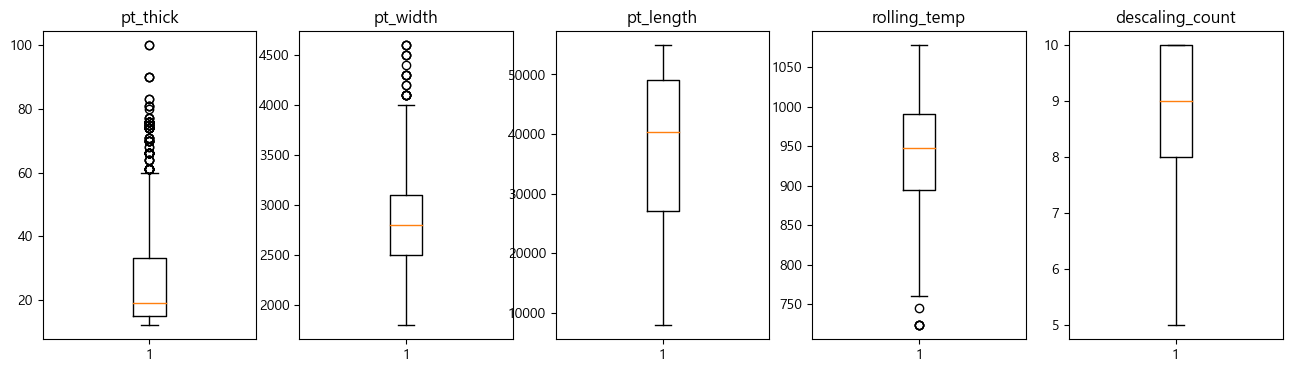

In [14]:
fig, ax = plt.subplots(1,5,figsize=(16,4))
ax[0].boxplot(df_raw.pt_thick)
ax[0].set_title("pt_thick")

ax[1].boxplot(df_raw.pt_width)
ax[1].set_title("pt_width")

ax[2].boxplot(df_raw.pt_length)
ax[2].set_title("pt_length")

ax[3].boxplot(df_raw.rolling_temp)
ax[3].set_title("rolling_temp")

ax[4].boxplot(df_raw.descaling_count)
ax[4].set_title("descaling_count")

plt.show()

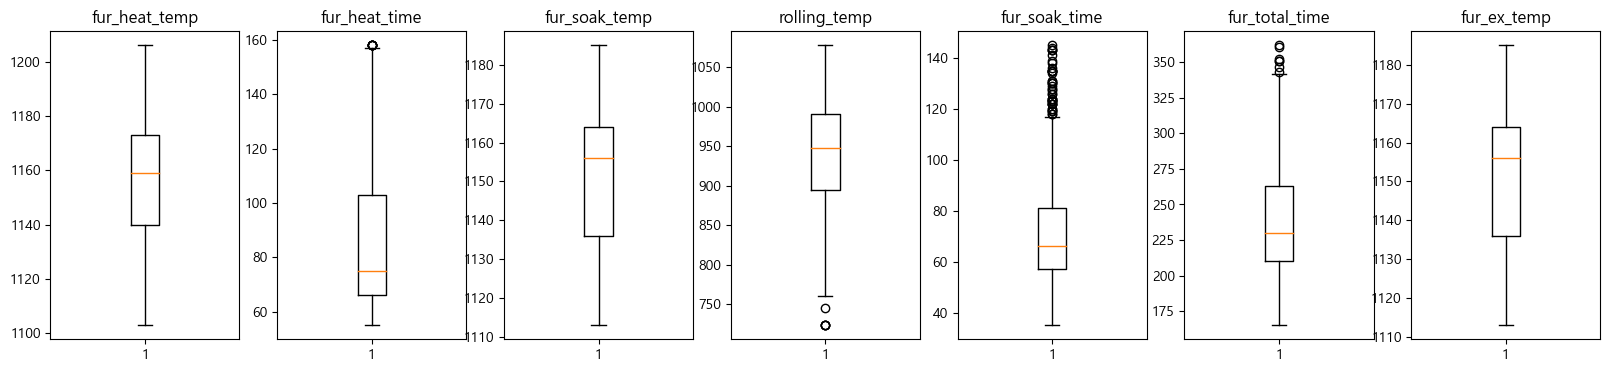

In [15]:
fig, ax = plt.subplots(1,7,figsize=(20,4))
ax[0].boxplot(df_raw.fur_heat_temp)
ax[0].set_title("fur_heat_temp")

ax[1].boxplot(df_raw.fur_heat_time)
ax[1].set_title("fur_heat_time")

ax[2].boxplot(df_raw.fur_soak_temp)
ax[2].set_title("fur_soak_temp")

ax[3].boxplot(df_raw.rolling_temp)
ax[3].set_title("rolling_temp")

ax[4].boxplot(df_raw.fur_soak_time)
ax[4].set_title("fur_soak_time")

ax[5].boxplot(df_raw.fur_total_time)
ax[5].set_title("fur_total_time")

ax[6].boxplot(df_raw.fur_ex_temp)
ax[6].set_title("fur_ex_temp")

plt.show()

연속형 변수들을 박스플롯을 그려 시각적으로 이상치를 확인해 본 결과 눈에 띄는 이상치는 없는 거으로 확인됨

### 범주형 변수 시각화

In [16]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 994 entries, 0 to 999
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   plate_no         994 non-null    object        
 1   rolling_date     994 non-null    datetime64[ns]
 2   scale            994 non-null    int64         
 3   spec_long        994 non-null    object        
 4   spec_country     994 non-null    object        
 5   steel_kind       994 non-null    object        
 6   pt_thick         994 non-null    int64         
 7   pt_width         994 non-null    int64         
 8   pt_length        994 non-null    int64         
 9   hsb              994 non-null    object        
 10  fur_no           994 non-null    object        
 11  fur_input_row    994 non-null    object        
 12  fur_heat_temp    994 non-null    int64         
 13  fur_heat_time    994 non-null    int64         
 14  fur_soak_temp    994 non-null    int64    

#### 목표변수 scale 빈도 확인

0 : 양품, 1 : 불량품

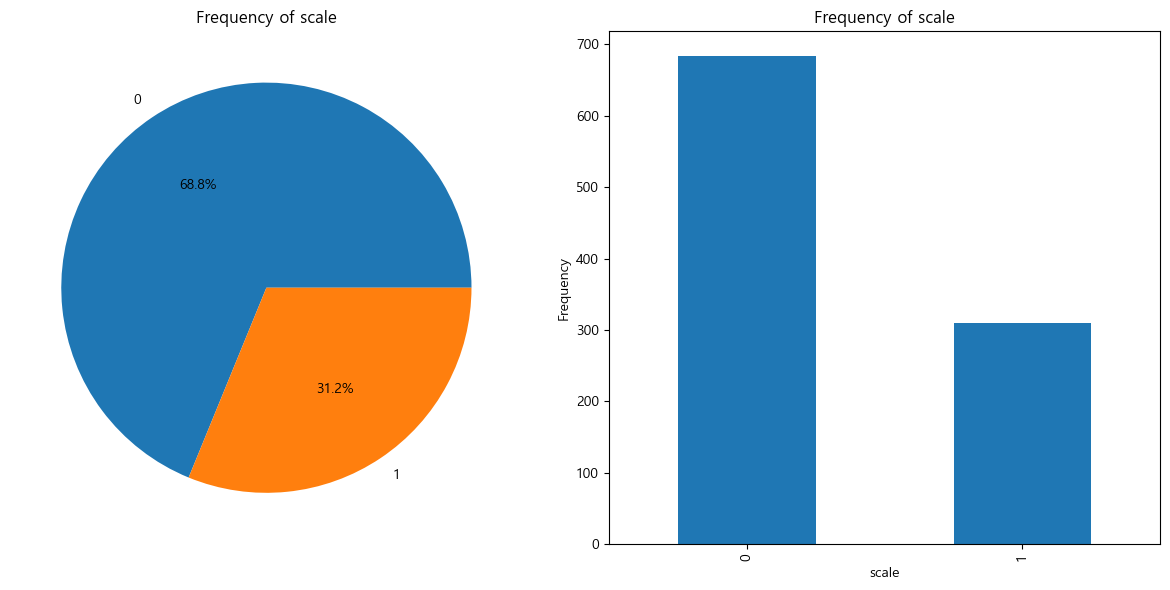

In [17]:
# 범주형 변수 빈도 계산
scale_counts = df_raw['scale'].value_counts()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))  # 서브플롯 생성

# 파이 차트 그리기
ax1.pie(scale_counts, labels= scale_counts.index, autopct='%1.1f%%')  # 파이 차트 그리기
ax1.set_title('Frequency of scale')  # 제목 설정

# 막대 그래프 그리기
scale_counts.plot(kind='bar', ax=ax2)  # 막대 그래프 그리기
ax2.set_title('Frequency of scale')  # 제목 설정
ax2.set_xlabel('scale')  # x축 레이블 설정
ax2.set_ylabel('Frequency')  # y축 레이블 설정

plt.tight_layout()  # 서브플롯 간격 조정
plt.show()  # 그래프 출력

#### spec_long 빈도 확인

In [18]:
df_raw['spec_long'].unique()

array(['AB/EH32-TM', 'NV-E36-TM', 'BV-EH36-TM', 'AB/EH36-TM', 'COMMON',
       'BV-AH32-TM', 'GL-E32-TM', 'GL-E36-TM', 'BV-EH32-TM', 'KS-HSB600',
       'LR-EH36-TM', 'BV-B', 'AB/B', 'LR-B', 'JS-SM490YB', 'KR-B', 'LR-A',
       'JS-SM490A', 'KS-SM400B', 'JS-SM400B', 'KS-SS400', 'KR-A',
       'JS-SS400', 'NV-A', 'KS-SM400A', 'KS-SM490B', 'V42JBN3', 'AB/A',
       'A516-60', 'BV-AH32', 'JS-SM490YA', 'AB/AH32', 'GL-A32', 'LR-AH32',
       'CCS-B', 'NV-B', 'NV-A32', 'KS-SM490A', 'GL-A', 'NK-KA32',
       'LR-AH36', 'A709-36', 'KR-AH32', 'BV-A', 'NK-KA', 'NV-D36-TM',
       'NK-KA32-TM', 'GL-A32-TM', 'LR-AH36-TM', 'LR-EH32-TM', 'NV-E32-TM',
       'KS-HSB500', 'API-2W-50T', 'GL-A36-TM', 'NV-A32-TM', 'NV-D32-TM',
       'NK-KD36-TM', 'GL-D36-TM', 'PILAC-BT33', 'NV-A36-TM', 'BV-AH36-TM',
       'A131-DH36TM', 'BV-AH36-TL', 'SA283-C', 'A283-C', 'JS-SM400A'],
      dtype=object)

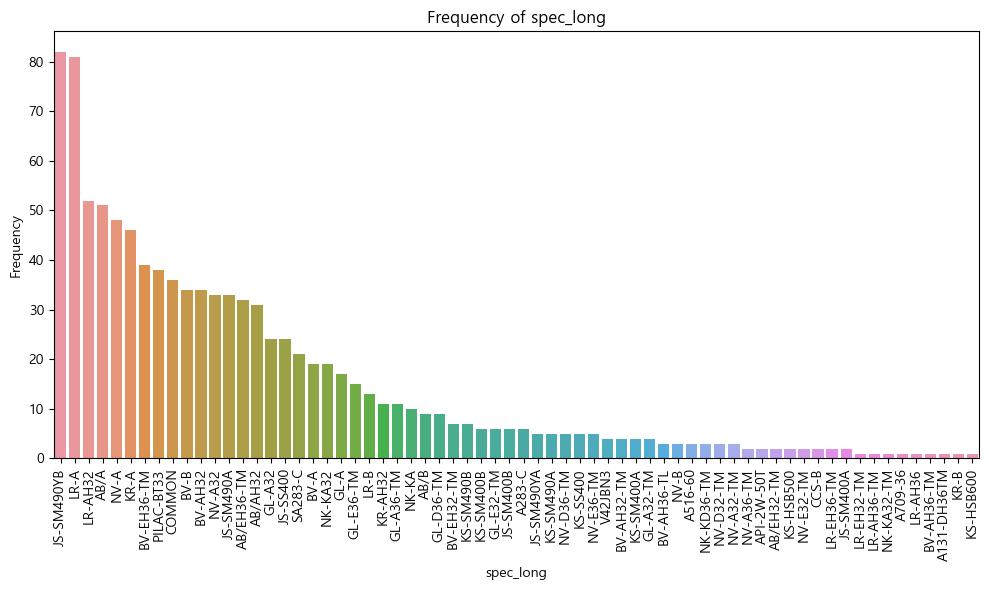

In [19]:
# 범주형 변수 빈도 계산
spec_long_counts = df_raw['spec_long'].value_counts()

# 막대 그래프 그리기
plt.figure(figsize=(10, 6))  # 그래프 크기 설정
sns.barplot(x=spec_long_counts.index, y=spec_long_counts)  # 막대 그래프 그리기
plt.title('Frequency of spec_long')  # 제목 설정
plt.xlabel('spec_long')  # x축 레이블 설정
plt.ylabel('Frequency')  # y축 레이블 설정
plt.xticks(rotation=90)  # x축 레이블 회전

plt.tight_layout()  # 서브플롯 간격 조정
plt.show()  # 그래프 출력

#### spec_country 빈도 확인

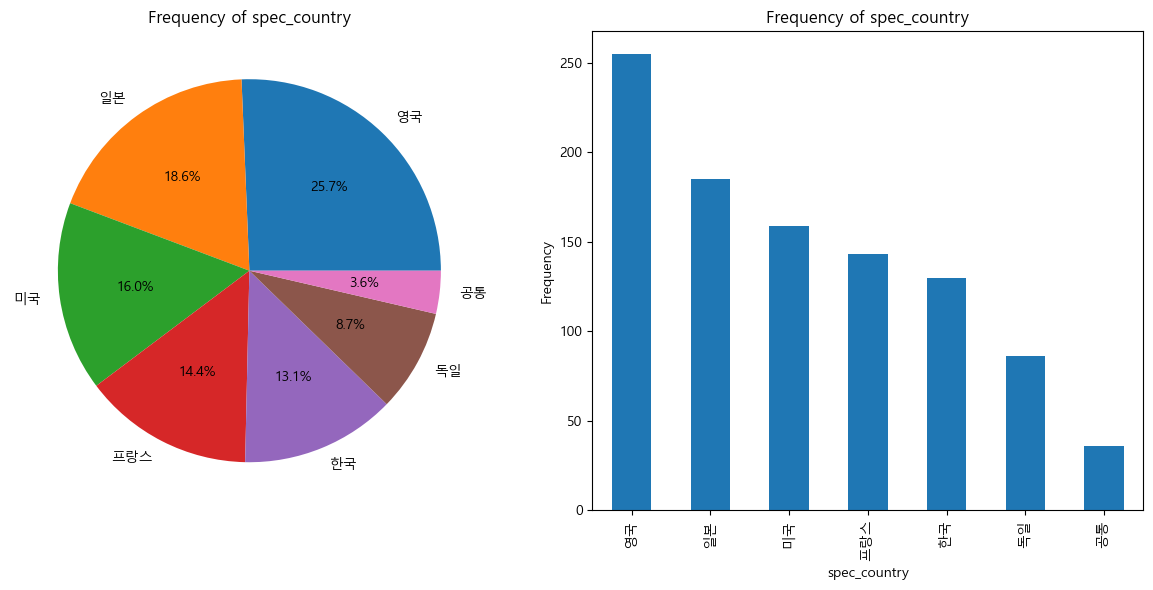

In [20]:
# 범주형 변수 빈도 계산
spec_country_counts = df_raw['spec_country'].value_counts()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))  # 서브플롯 생성

# 파이 차트 그리기
ax1.pie(spec_country_counts, labels=spec_country_counts.index, autopct='%1.1f%%')  # 파이 차트 그리기
ax1.set_title('Frequency of spec_country')  # 제목 설정

# 막대 그래프 그리기
spec_country_counts.plot(kind='bar', ax=ax2)  # 막대 그래프 그리기
ax2.set_title('Frequency of spec_country')  # 제목 설정
ax2.set_xlabel('spec_country')  # x축 레이블 설정
ax2.set_ylabel('Frequency')  # y축 레이블 설정

plt.tight_layout()  # 서브플롯 간격 조정
plt.show()  # 그래프 출력

#### steel_kind 빈도 확인

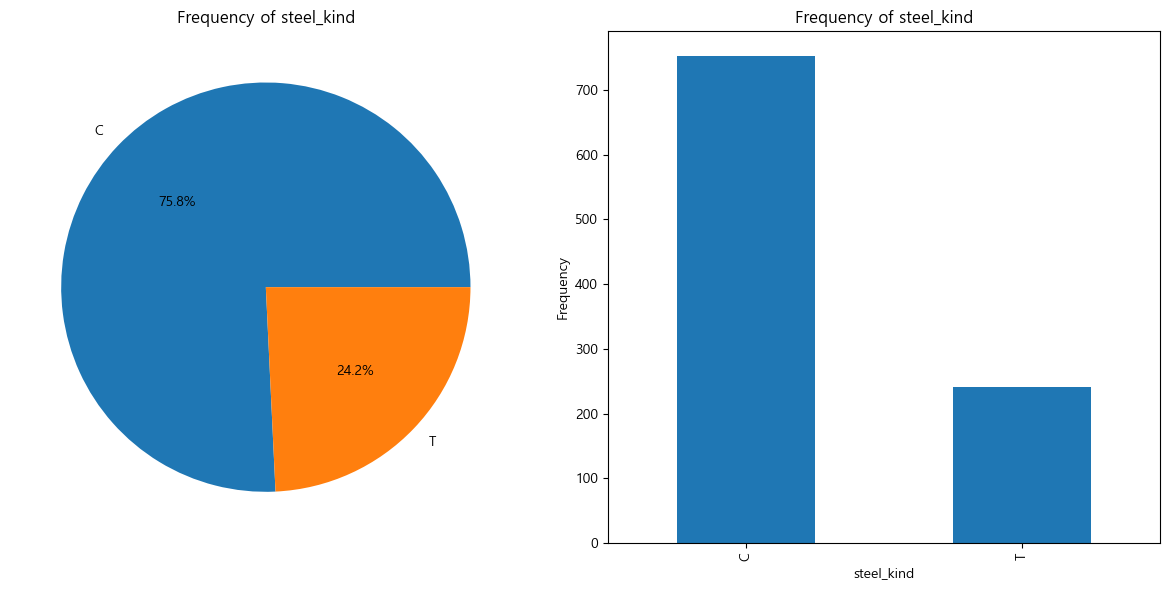

In [21]:
# 범주형 변수 빈도 계산
steel_kind_counts = df_raw['steel_kind'].value_counts()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))  # 서브플롯 생성

# 파이 차트 그리기
ax1.pie(steel_kind_counts, labels=steel_kind_counts.index, autopct='%1.1f%%')  # 파이 차트 그리기
ax1.set_title('Frequency of steel_kind')  # 제목 설정

# 막대 그래프 그리기
steel_kind_counts.plot(kind='bar', ax=ax2)  # 막대 그래프 그리기
ax2.set_title('Frequency of steel_kind')  # 제목 설정
ax2.set_xlabel('steel_kind')  # x축 레이블 설정
ax2.set_ylabel('Frequency')  # y축 레이블 설정

plt.tight_layout()  # 서브플롯 간격 조정
plt.show()  # 그래프 출력

#### hsb 빈도 확인

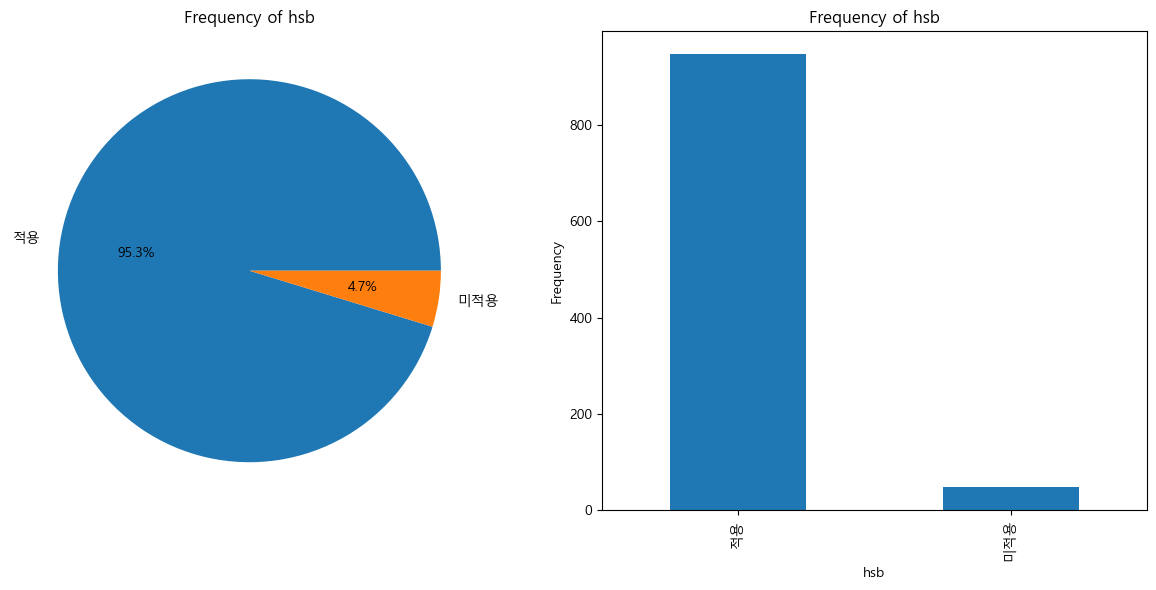

In [22]:
# 범주형 변수 빈도 계산
hsb_counts = df_raw['hsb'].value_counts()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))  # 서브플롯 생성

# 파이 차트 그리기
ax1.pie(hsb_counts, labels=hsb_counts.index, autopct='%1.1f%%')  # 파이 차트 그리기
ax1.set_title('Frequency of hsb')  # 제목 설정

# 막대 그래프 그리기
hsb_counts.plot(kind='bar', ax=ax2)  # 막대 그래프 그리기
ax2.set_title('Frequency of hsb')  # 제목 설정
ax2.set_xlabel('hsb')  # x축 레이블 설정
ax2.set_ylabel('Frequency')  # y축 레이블 설정

plt.tight_layout()  # 서브플롯 간격 조정
plt.show()  # 그래프 출력

#### fur_no 빈도 확인

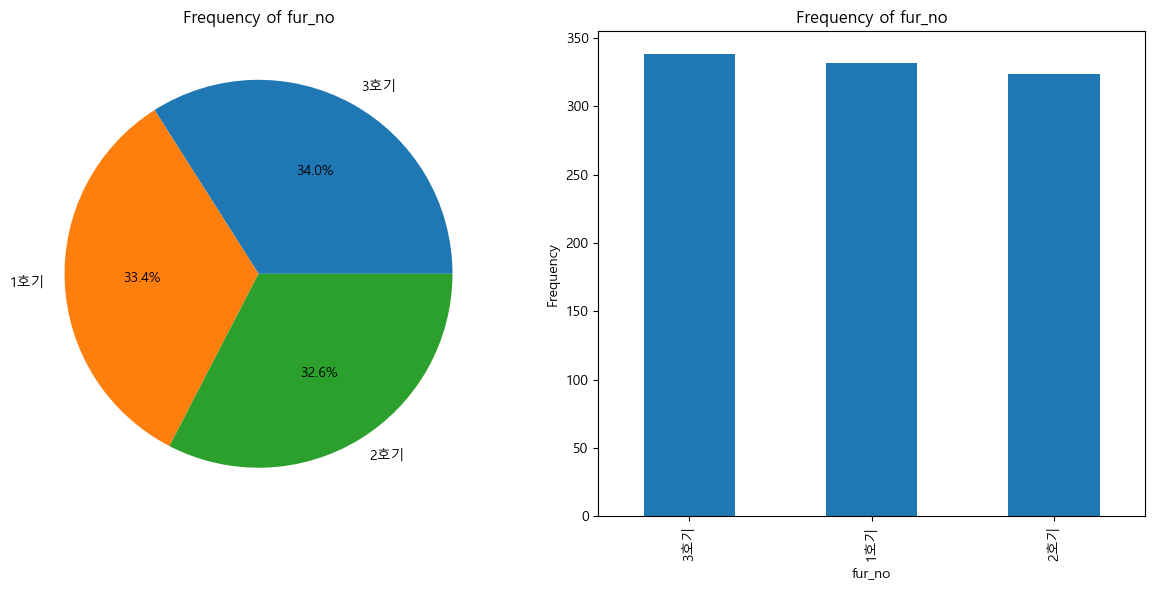

In [23]:
# 범주형 변수 빈도 계산
fur_no_counts = df_raw['fur_no'].value_counts()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))  # 서브플롯 생성

# 파이 차트 그리기
ax1.pie(fur_no_counts, labels=fur_no_counts.index, autopct='%1.1f%%')  # 파이 차트 그리기
ax1.set_title('Frequency of fur_no')  # 제목 설정

# 막대 그래프 그리기
fur_no_counts.plot(kind='bar', ax=ax2)  # 막대 그래프 그리기
ax2.set_title('Frequency of fur_no')  # 제목 설정
ax2.set_xlabel('fur_no')  # x축 레이블 설정
ax2.set_ylabel('Frequency')  # y축 레이블 설정

plt.tight_layout()  # 서브플롯 간격 조정
plt.show()  # 그래프 출력

#### fur_input_row 빈도 확인

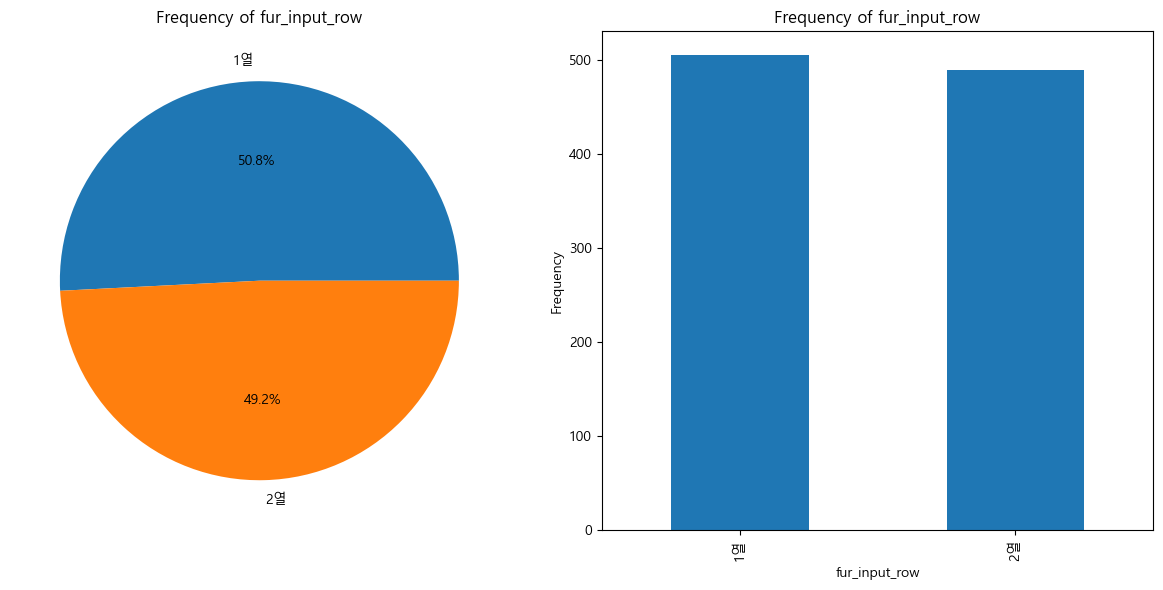

In [24]:
# 범주형 변수 빈도 계산
fur_input_row_counts = df_raw['fur_input_row'].value_counts()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))  # 서브플롯 생성

# 파이 차트 그리기
ax1.pie(fur_input_row_counts, labels=fur_input_row_counts.index, autopct='%1.1f%%')  # 파이 차트 그리기
ax1.set_title('Frequency of fur_input_row')  # 제목 설정

# 막대 그래프 그리기
fur_input_row_counts.plot(kind='bar', ax=ax2)  # 막대 그래프 그리기
ax2.set_title('Frequency of fur_input_row')  # 제목 설정
ax2.set_xlabel('fur_input_row')  # x축 레이블 설정
ax2.set_ylabel('Frequency')  # y축 레이블 설정

plt.tight_layout()  # 서브플롯 간격 조정
plt.show()  # 그래프 출력

#### rolling_method 빈도 확인

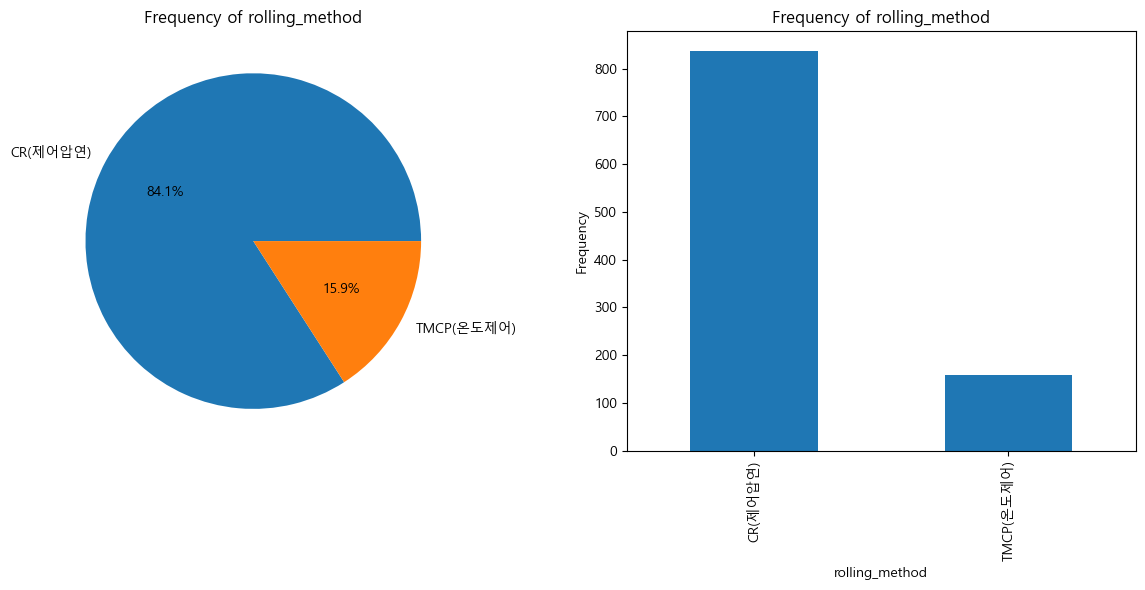

In [25]:
# 범주형 변수 빈도 계산
rolling_method_counts = df_raw['rolling_method'].value_counts()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))  # 서브플롯 생성

# 파이 차트 그리기
ax1.pie(rolling_method_counts, labels=rolling_method_counts.index, autopct='%1.1f%%')  # 파이 차트 그리기
ax1.set_title('Frequency of rolling_method')  # 제목 설정

# 막대 그래프 그리기
rolling_method_counts.plot(kind='bar', ax=ax2)  # 막대 그래프 그리기
ax2.set_title('Frequency of rolling_method')  # 제목 설정
ax2.set_xlabel('rolling_method')  # x축 레이블 설정
ax2.set_ylabel('Frequency')  # y축 레이블 설정

plt.tight_layout()  # 서브플롯 간격 조정
plt.show()  # 그래프 출력

#### work_group 빈도 확인

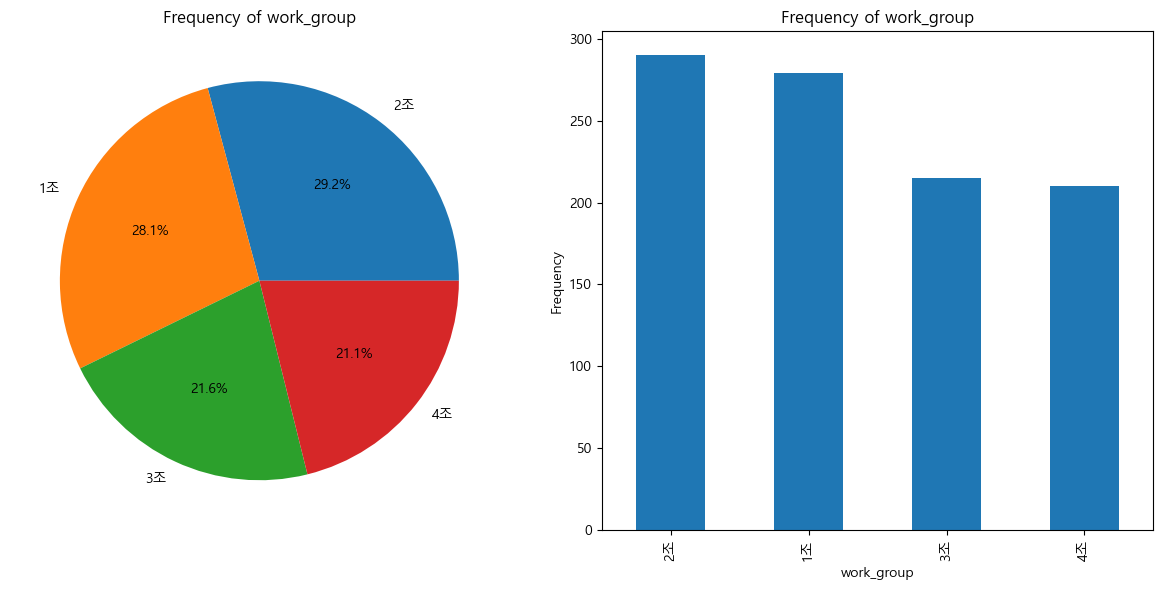

In [26]:
# 범주형 변수 빈도 계산
work_group_counts = df_raw['work_group'].value_counts()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))  # 서브플롯 생성

# 파이 차트 그리기
ax1.pie(work_group_counts, labels=work_group_counts.index, autopct='%1.1f%%')  # 파이 차트 그리기
ax1.set_title('Frequency of work_group')  # 제목 설정

# 막대 그래프 그리기
work_group_counts.plot(kind='bar', ax=ax2)  # 막대 그래프 그리기
ax2.set_title('Frequency of work_group')  # 제목 설정
ax2.set_xlabel('work_group')  # x축 레이블 설정
ax2.set_ylabel('Frequency')  # y축 레이블 설정

plt.tight_layout()  # 서브플롯 간격 조정
plt.show()  # 그래프 출력

### 연속형 변수 분포 확인

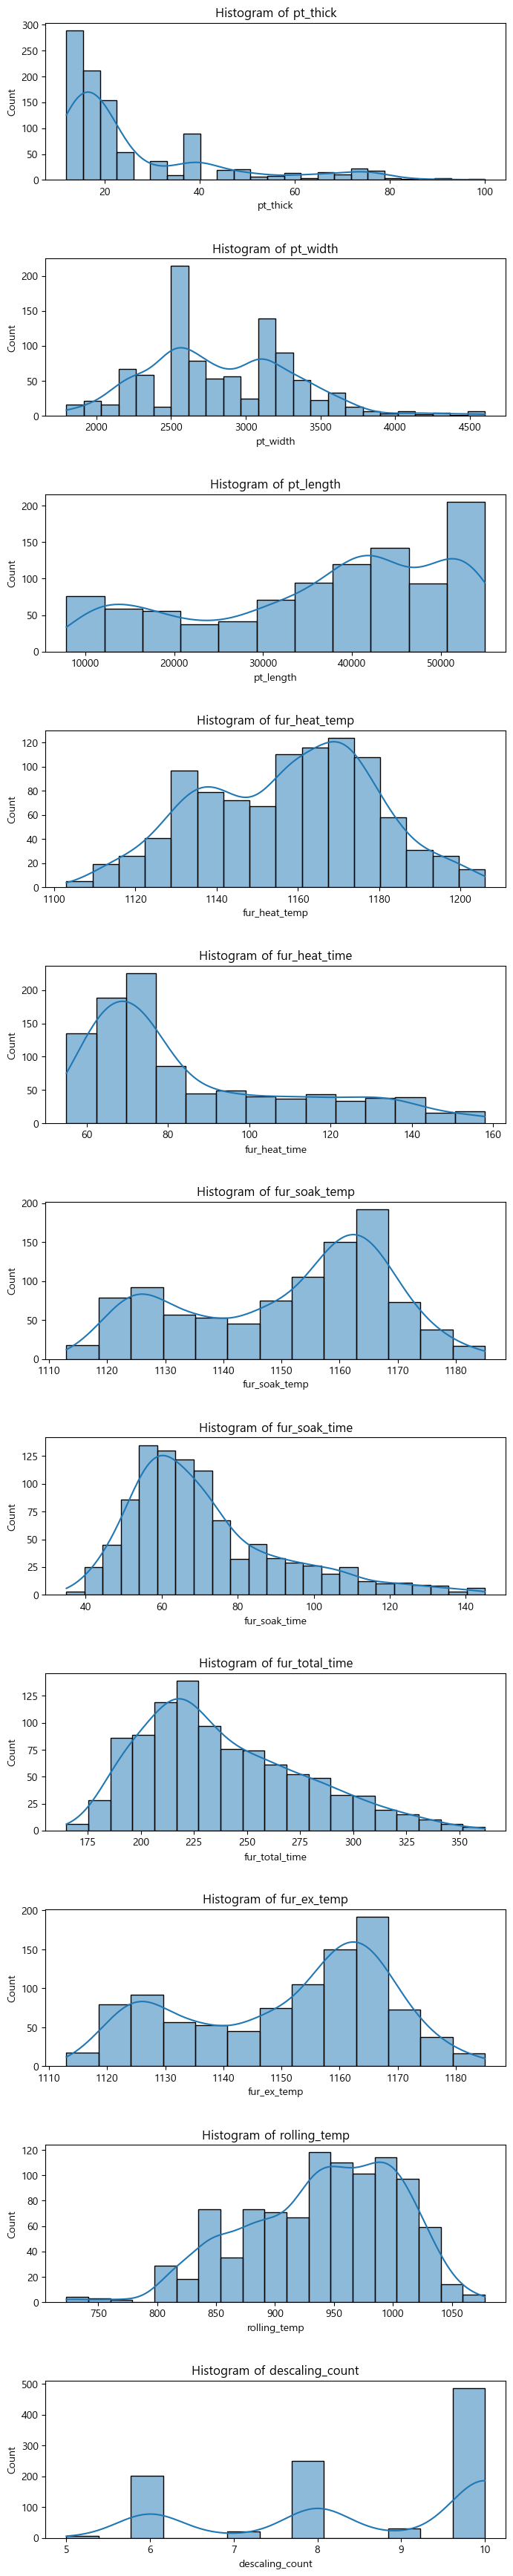

In [27]:

cols = ['pt_thick', 'pt_width', 'pt_length', 'fur_heat_temp', 'fur_heat_time',
        'fur_soak_temp', 'fur_soak_time', 'fur_total_time', 'fur_ex_temp',
        'rolling_temp', 'descaling_count']

fig, axes = plt.subplots(nrows=len(cols), ncols=1, figsize=(8, len(cols)*4))
plt.subplots_adjust(hspace=0.5)

for i, col in enumerate(cols):
    ax = axes[i]
    sns.histplot(data=df_raw, x=col, ax=ax, kde=True)
    ax.set_title(f'Histogram of {col}')

plt.show()

### 범주형 설명변수와 목표변수과의 관계

In [28]:
def fun_print_crosstab(data,var):
    print(pd.crosstab(index = data["scale"],columns = data[var]))

In [29]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 994 entries, 0 to 999
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   plate_no         994 non-null    object        
 1   rolling_date     994 non-null    datetime64[ns]
 2   scale            994 non-null    int64         
 3   spec_long        994 non-null    object        
 4   spec_country     994 non-null    object        
 5   steel_kind       994 non-null    object        
 6   pt_thick         994 non-null    int64         
 7   pt_width         994 non-null    int64         
 8   pt_length        994 non-null    int64         
 9   hsb              994 non-null    object        
 10  fur_no           994 non-null    object        
 11  fur_input_row    994 non-null    object        
 12  fur_heat_temp    994 non-null    int64         
 13  fur_heat_time    994 non-null    int64         
 14  fur_soak_temp    994 non-null    int64    

In [30]:
# steel_kind(강종)
fun_print_crosstab(df_raw,"steel_kind")

steel_kind    C    T
scale               
0           463  221
1           290   20


In [31]:
# 가열로 호기
fun_print_crosstab(df_raw,"fur_no")

fur_no  1호기  2호기  3호기
scale                
0       231  232  221
1       101   92  117


In [32]:
# hsb적용여부
fun_print_crosstab(df_raw,"hsb")

hsb    미적용   적용
scale          
0        0  684
1       47  263


In [33]:
# 가열로 장입열
fun_print_crosstab(df_raw,"fur_input_row")

fur_input_row   1열   2열
scale                  
0              340  344
1              165  145


In [34]:
# 압연방법
fun_print_crosstab(df_raw,"rolling_method")

rolling_method  CR(제어압연)  TMCP(온도제어)
scale                               
0                    539         145
1                    297          13


In [35]:
# WORK GR 작업조
fun_print_crosstab(df_raw,"work_group")

work_group   1조   2조   3조   4조
scale                         
0           170  205  149  160
1           109   85   66   50


### 범주형 변수와 목표변수 간의 가설검정(카이제곱)

#### steel_kind(강종)

<Axes: >

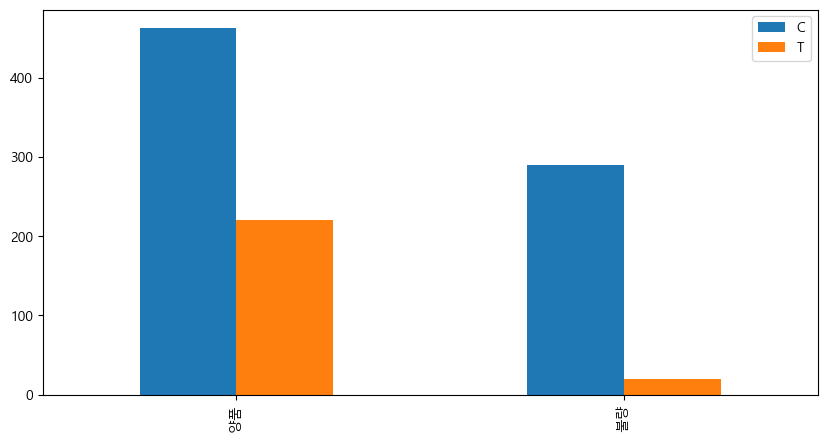

In [36]:
postive = df_raw[df_raw["scale"]==0]["steel_kind"].value_counts()
negative = df_raw[df_raw["scale"]==1]["steel_kind"].value_counts()
df_steel_kind = pd.DataFrame([postive,negative])
df_steel_kind.index = ['양품','불량']
df_steel_kind.plot(kind = 'bar', figsize= (10,5))

In [37]:
df_steel_kind

,C,T
양품,463,221
불량,290,20


In [38]:
chi,p,dof,expected = stats.chi2_contingency(df_steel_kind)
print("chi-square test")
print('chiq: {0:0.3f}'.format(chi))
print("p-value: {0:0.3f}".format(p))
print("degree pf freedom: {}".format(dof))
print("expected value: \n{}".format(expected.round(3)))

chi-square test
chiq: 76.258
p-value: 0.000
degree pf freedom: 1
expected value: 
[[518.161 165.839]
 [234.839  75.161]]


#### HSB 적용여부

<Axes: >

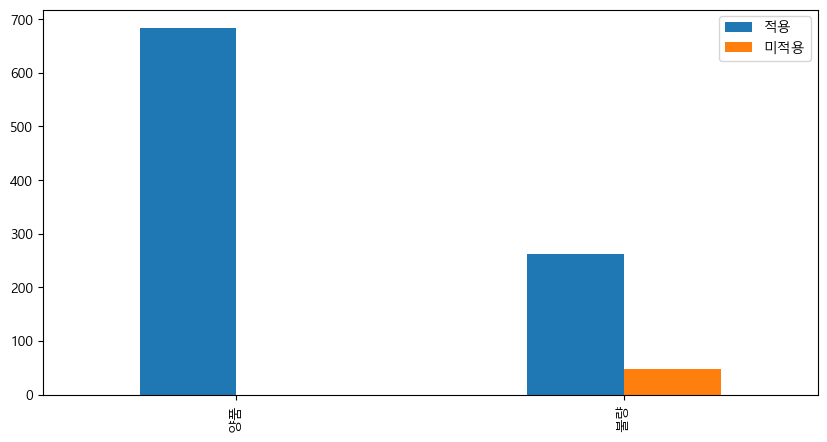

In [39]:
postive = df_raw[df_raw["scale"]==0]["hsb"].value_counts()
negative = df_raw[df_raw["scale"]==1]["hsb"].value_counts()
df_hsb = pd.DataFrame([postive,negative])
df_hsb.index = ['양품','불량']
df_hsb.plot(kind = 'bar', figsize= (10,5))

In [40]:
df_hsb.iloc[0,1] = 0

In [41]:
df_hsb

,적용,미적용
양품,684.0,0.0
불량,263.0,47.0


In [42]:
chi,p,dof,expected = stats.chi2_contingency(df_hsb)
print("chi-square test")
print('chiq: {0:0.3f}'.format(chi))
print("p-value: {0:0.3f}".format(p))
print("degree pf freedom: {}".format(dof))
print("expected value: \n{}".format(expected.round(3)))

chi-square test
chiq: 105.510
p-value: 0.000
degree pf freedom: 1
expected value: 
[[651.658  32.342]
 [295.342  14.658]]


#### fur_no(가열로 호기)

<Axes: >

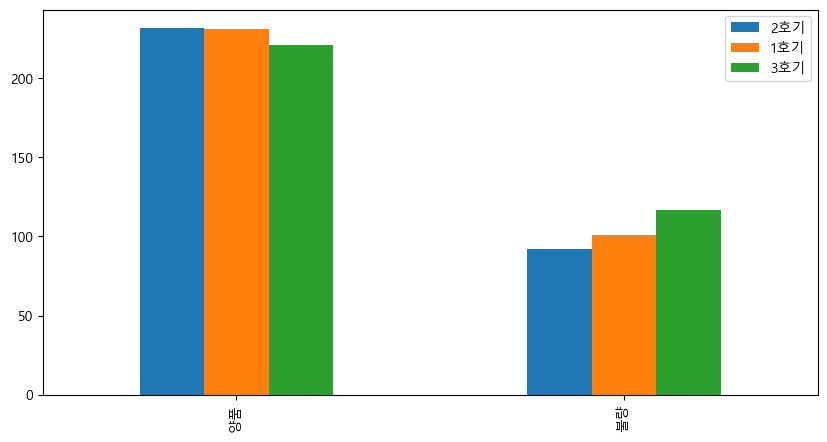

In [43]:
postive = df_raw[df_raw["scale"]==0]["fur_no"].value_counts()
negative = df_raw[df_raw["scale"]==1]["fur_no"].value_counts()
df_fur_no = pd.DataFrame([postive,negative])
df_fur_no.index = ['양품','불량']
df_fur_no.plot(kind = 'bar', figsize= (10,5))

In [44]:
df_fur_no

,2호기,1호기,3호기
양품,232,231,221
불량,92,101,117


In [45]:
chi,p,dof,expected = stats.chi2_contingency(df_fur_no)
print("chi-square test")
print('chiq: {0:0.3f}'.format(chi))
print("p-value: {0:0.3f}".format(p))
print("degree pf freedom: {}".format(dof))
print("expected value: \n{}".format(expected.round(3)))

chi-square test
chiq: 3.119
p-value: 0.210
degree pf freedom: 2
expected value: 
[[222.954 228.459 232.588]
 [101.046 103.541 105.412]]


#### fur_input_row(가열로 장입열)

<Axes: >

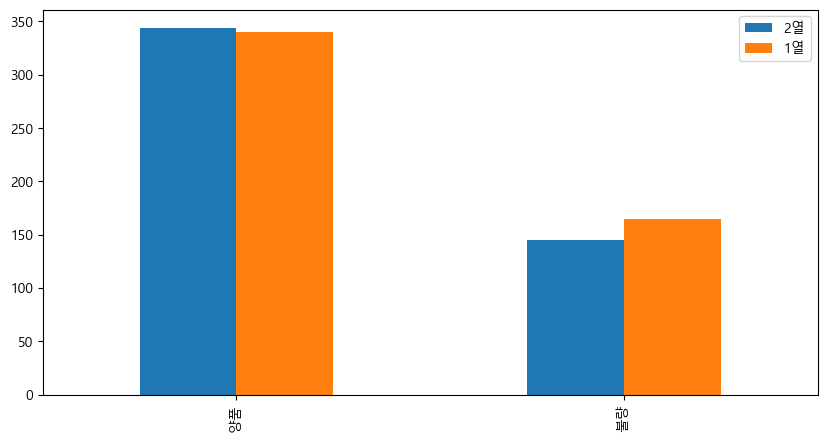

In [46]:
postive = df_raw[df_raw["scale"]==0]["fur_input_row"].value_counts()
negative = df_raw[df_raw["scale"]==1]["fur_input_row"].value_counts()
df_fur_input_row = pd.DataFrame([postive,negative])
df_fur_input_row.index = ['양품','불량']
df_fur_input_row.plot(kind = 'bar', figsize= (10,5))

In [47]:
df_fur_input_row

,2열,1열
양품,344,340
불량,145,165


In [48]:
chi,p,dof,expected = stats.chi2_contingency(df_fur_input_row)
print("chi-square test")
print('chiq: {0:0.3f}'.format(chi))
print("p-value: {0:0.3f}".format(p))
print("degree pf freedom: {}".format(dof))
print("expected value: \n{}".format(expected.round(3)))

chi-square test
chiq: 0.920
p-value: 0.337
degree pf freedom: 1
expected value: 
[[336.495 347.505]
 [152.505 157.495]]


#### rolling_method(압연방법)

<Axes: >

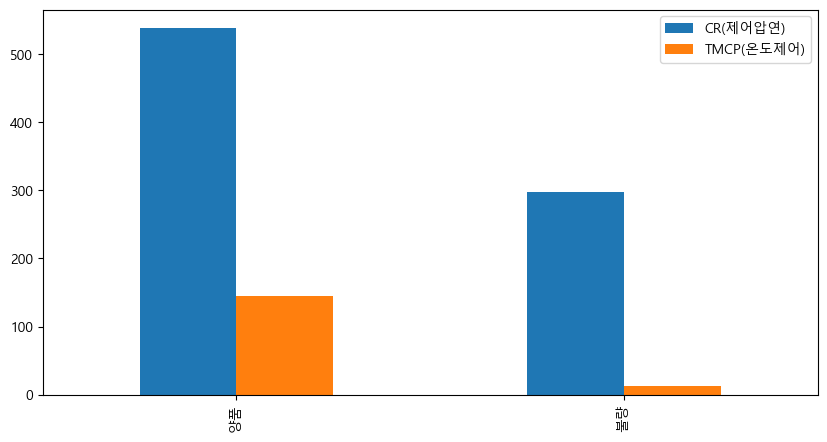

In [49]:
postive = df_raw[df_raw["scale"]==0]["rolling_method"].value_counts()
negative = df_raw[df_raw["scale"]==1]["rolling_method"].value_counts()
df_rolling_method = pd.DataFrame([postive,negative])
df_rolling_method.index = ['양품','불량']
df_rolling_method.plot(kind = 'bar', figsize= (10,5))

In [50]:
df_rolling_method

,CR(제어압연),TMCP(온도제어)
양품,539,145
불량,297,13


In [51]:
chi,p,dof,expected = stats.chi2_contingency(df_rolling_method)
print("chi-square test")
print('chiq: {0:0.3f}'.format(chi))
print("p-value: {0:0.3f}".format(p))
print("degree pf freedom: {}".format(dof))
print("expected value: \n{}".format(expected.round(3)))

chi-square test
chiq: 44.880
p-value: 0.000
degree pf freedom: 1
expected value: 
[[575.276 108.724]
 [260.724  49.276]]


#### work_group

<Axes: >

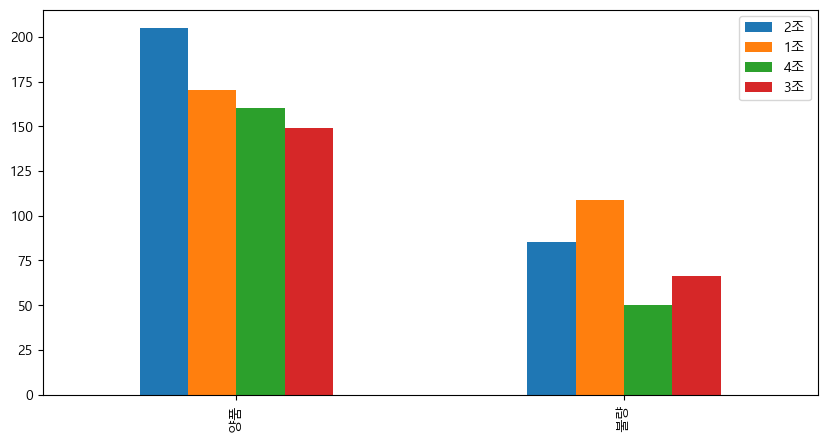

In [132]:
postive = df_raw[df_raw["scale"]==0]["work_group"].value_counts()
negative = df_raw[df_raw["scale"]==1]["work_group"].value_counts()
df_work_group = pd.DataFrame([postive,negative])
df_work_group.index = ['양품','불량']
df_work_group.plot(kind = 'bar', figsize= (10,5))

In [53]:
df_work_group

,2조,1조,4조,3조
양품,205,170,160,149
불량,85,109,50,66


In [54]:
chi,p,dof,expected = stats.chi2_contingency(df_work_group)
print("chi-square test")
print('chiq: {0:0.3f}'.format(chi))
print("p-value: {0:0.3f}".format(p))
print("degree pf freedom: {}".format(dof))
print("expected value: \n{}".format(expected.round(3)))

chi-square test
chiq: 13.901
p-value: 0.003
degree pf freedom: 3
expected value: 
[[199.557 191.988 144.507 147.948]
 [ 90.443  87.012  65.493  67.052]]


유의한 차이가 있다고 말할 수 있는 범주형 변수 : steel_kind, hsb, rolling_method, work_group  
나머지는 분석에 제외해도 상관이 없다고 판단 가능

### 연속형 변수와 목표변수 scale과의 관계

In [55]:
df_scale_x_num = df_raw.select_dtypes(exclude='object').columns

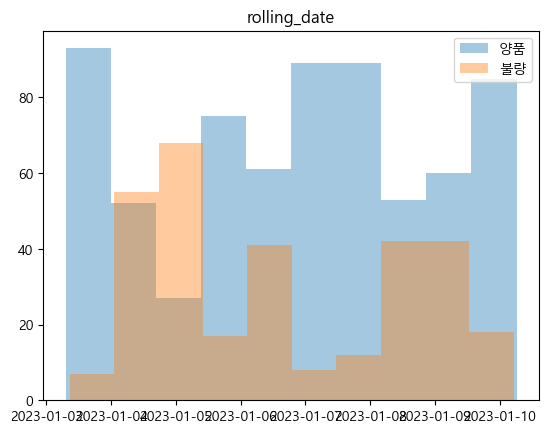

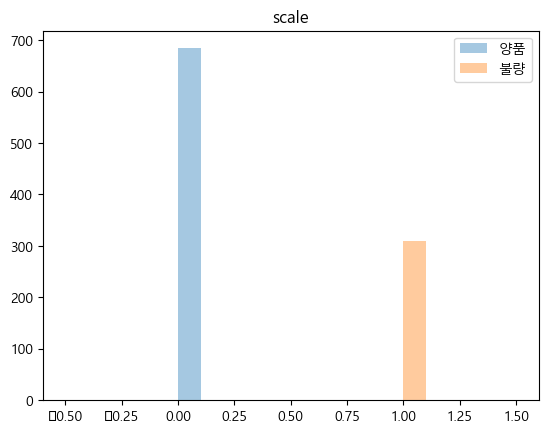

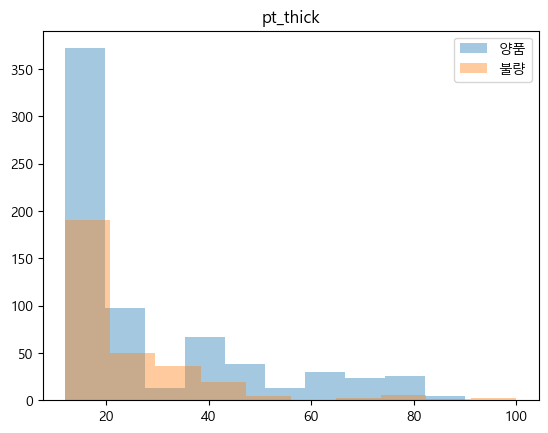

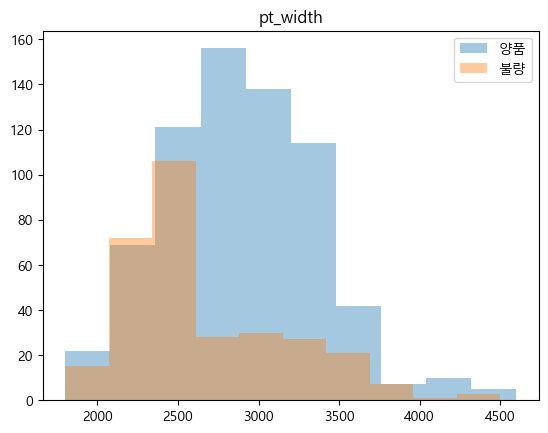

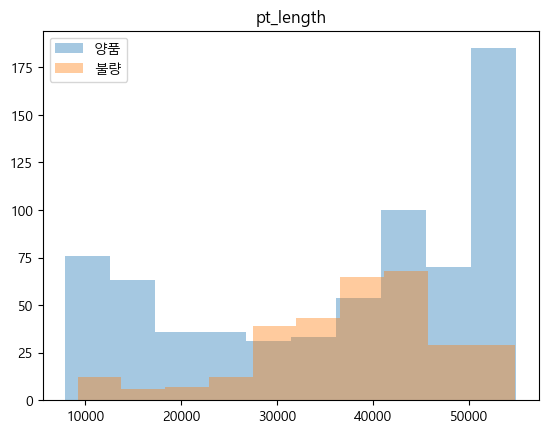

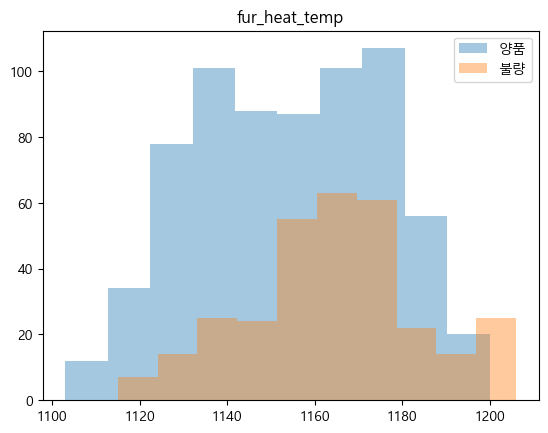

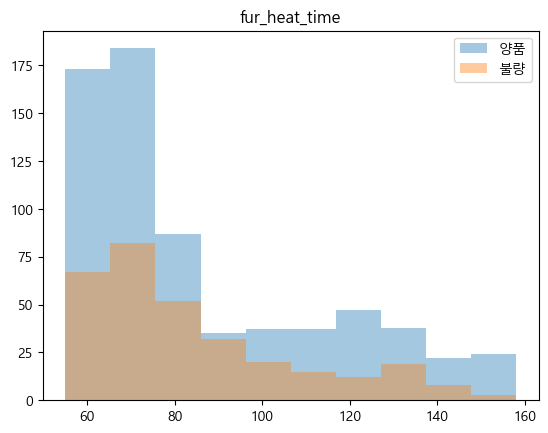

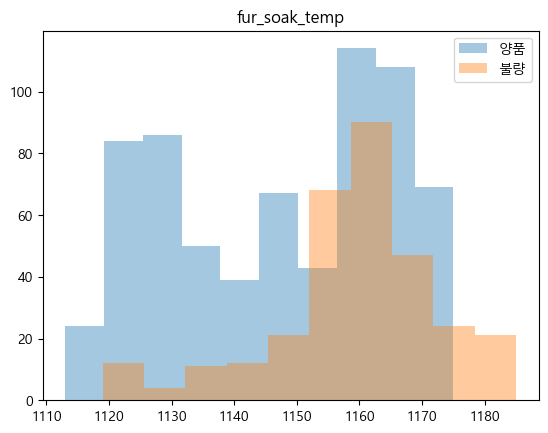

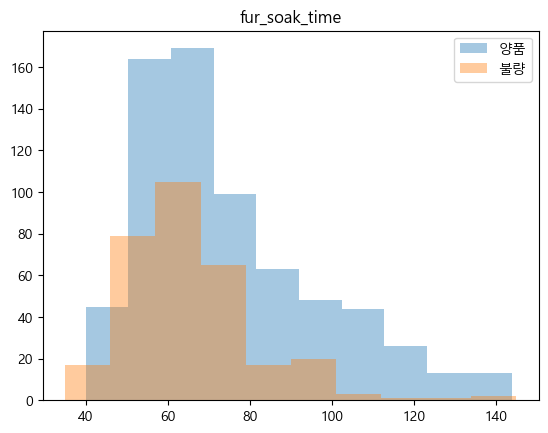

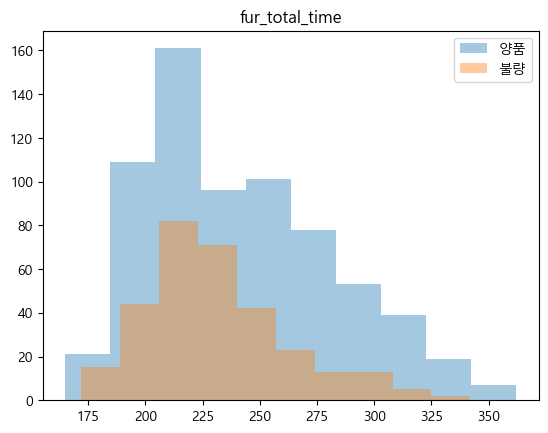

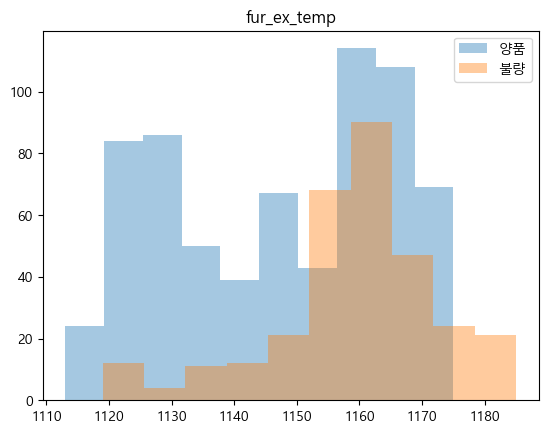

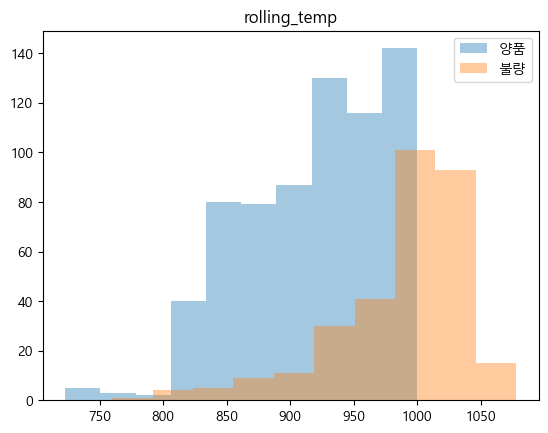

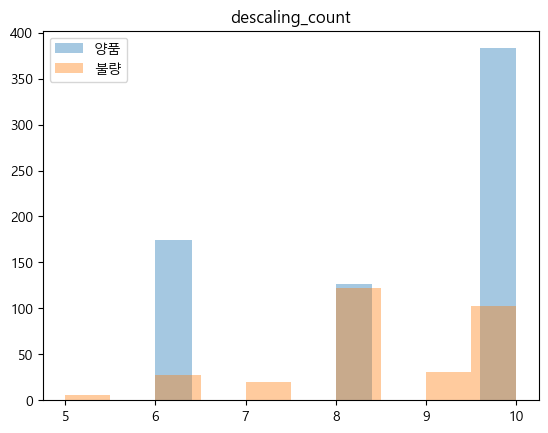

In [56]:
for col in df_scale_x_num:
    plt.hist(df_raw[df_raw["scale"]==0][col],label = "양품",alpha = 0.4)
    plt.hist(df_raw[df_raw["scale"]==1][col],label = "불량",alpha = 0.4)
    plt.legend()
    plt.title(col)
    plt.show()

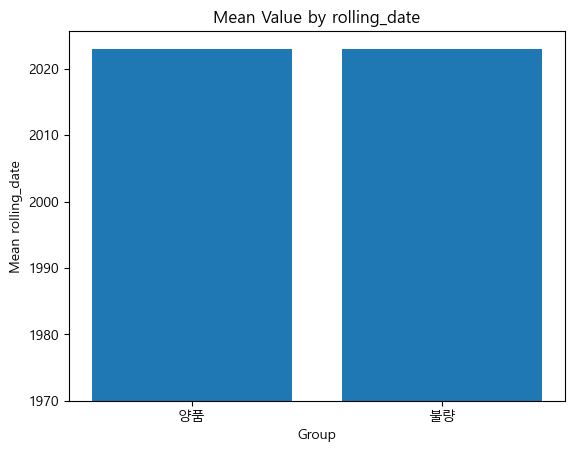

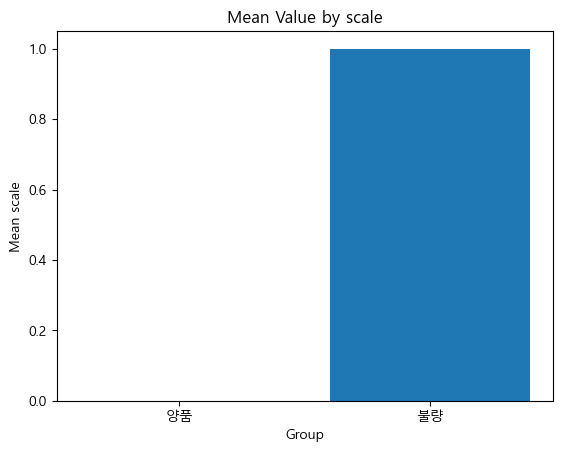

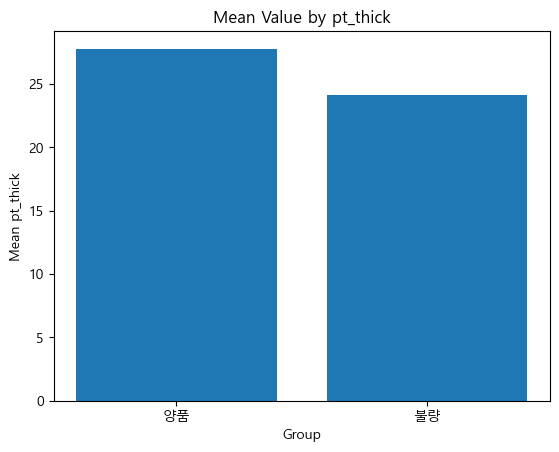

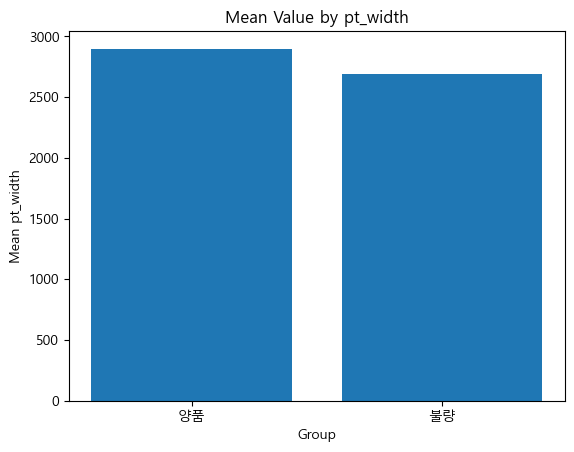

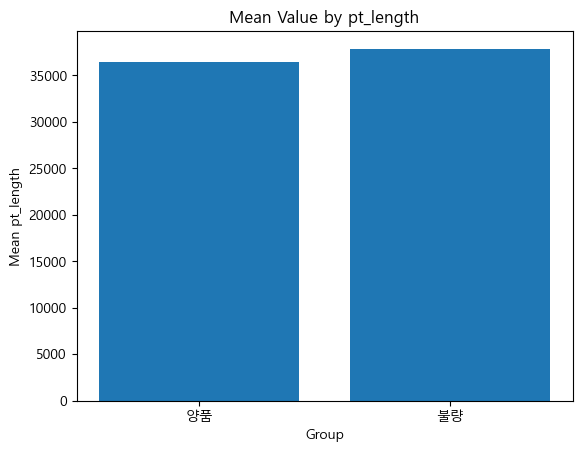

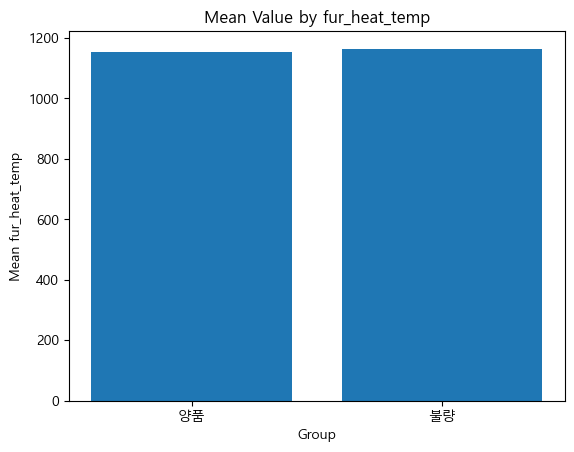

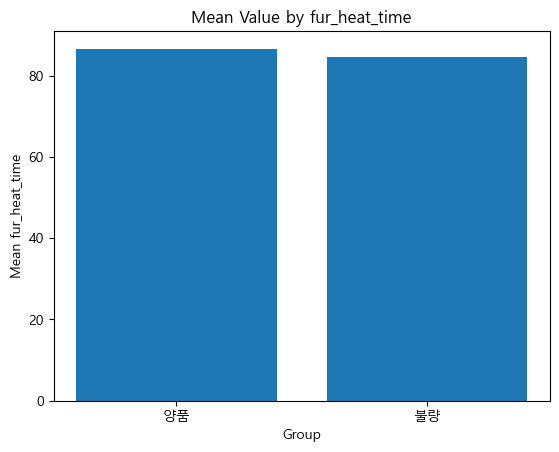

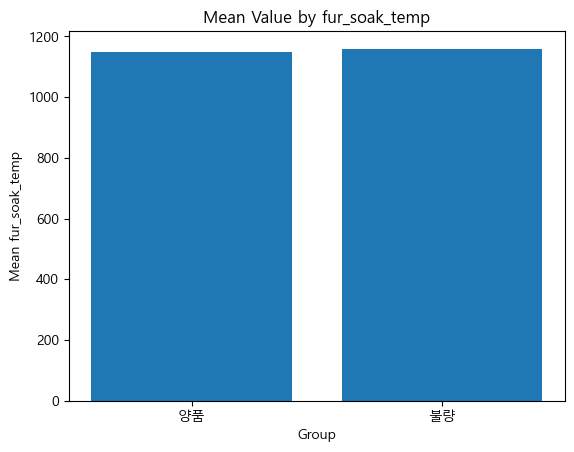

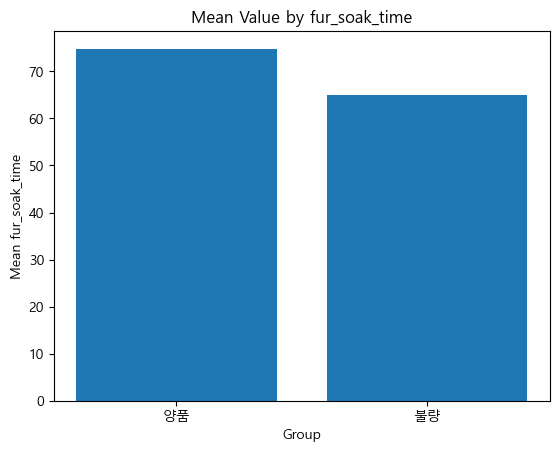

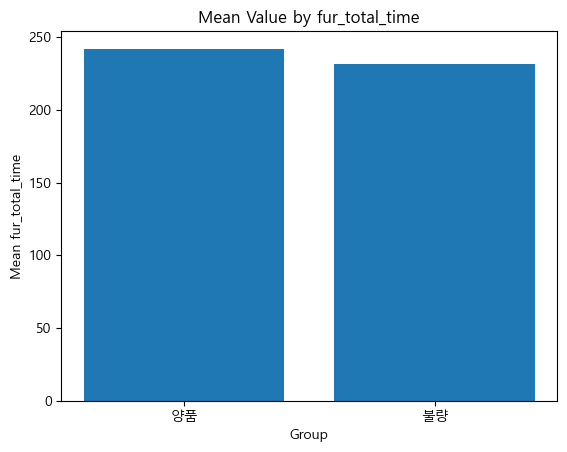

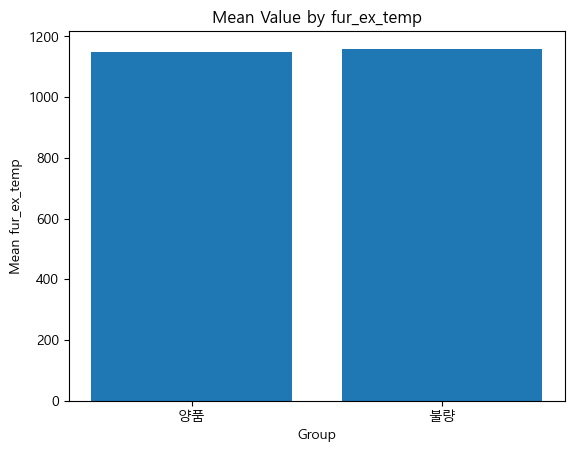

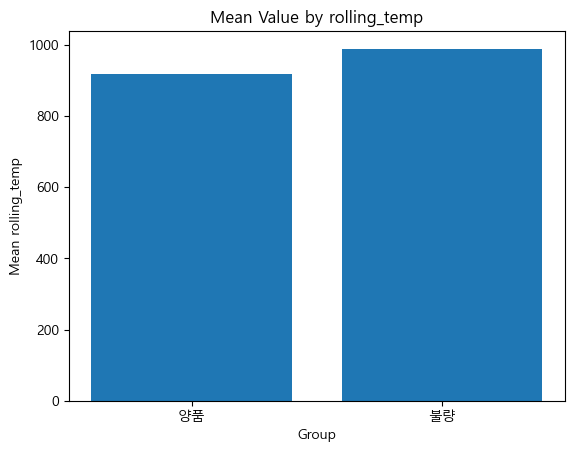

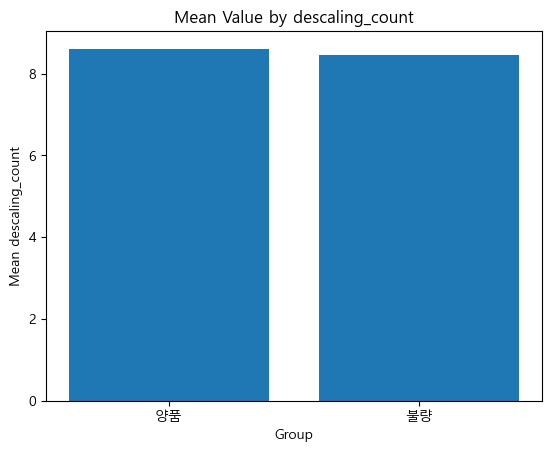

In [57]:
for col in df_scale_x_num:
    group_means = df_raw.groupby('scale')[col].mean()
    group_labels = ['양품', '불량']
    
    plt.bar(group_labels, group_means)
    plt.xlabel('Group')
    plt.ylabel('Mean ' + col)
    plt.title('Mean Value by ' + col)

    plt.show()

<Axes: >

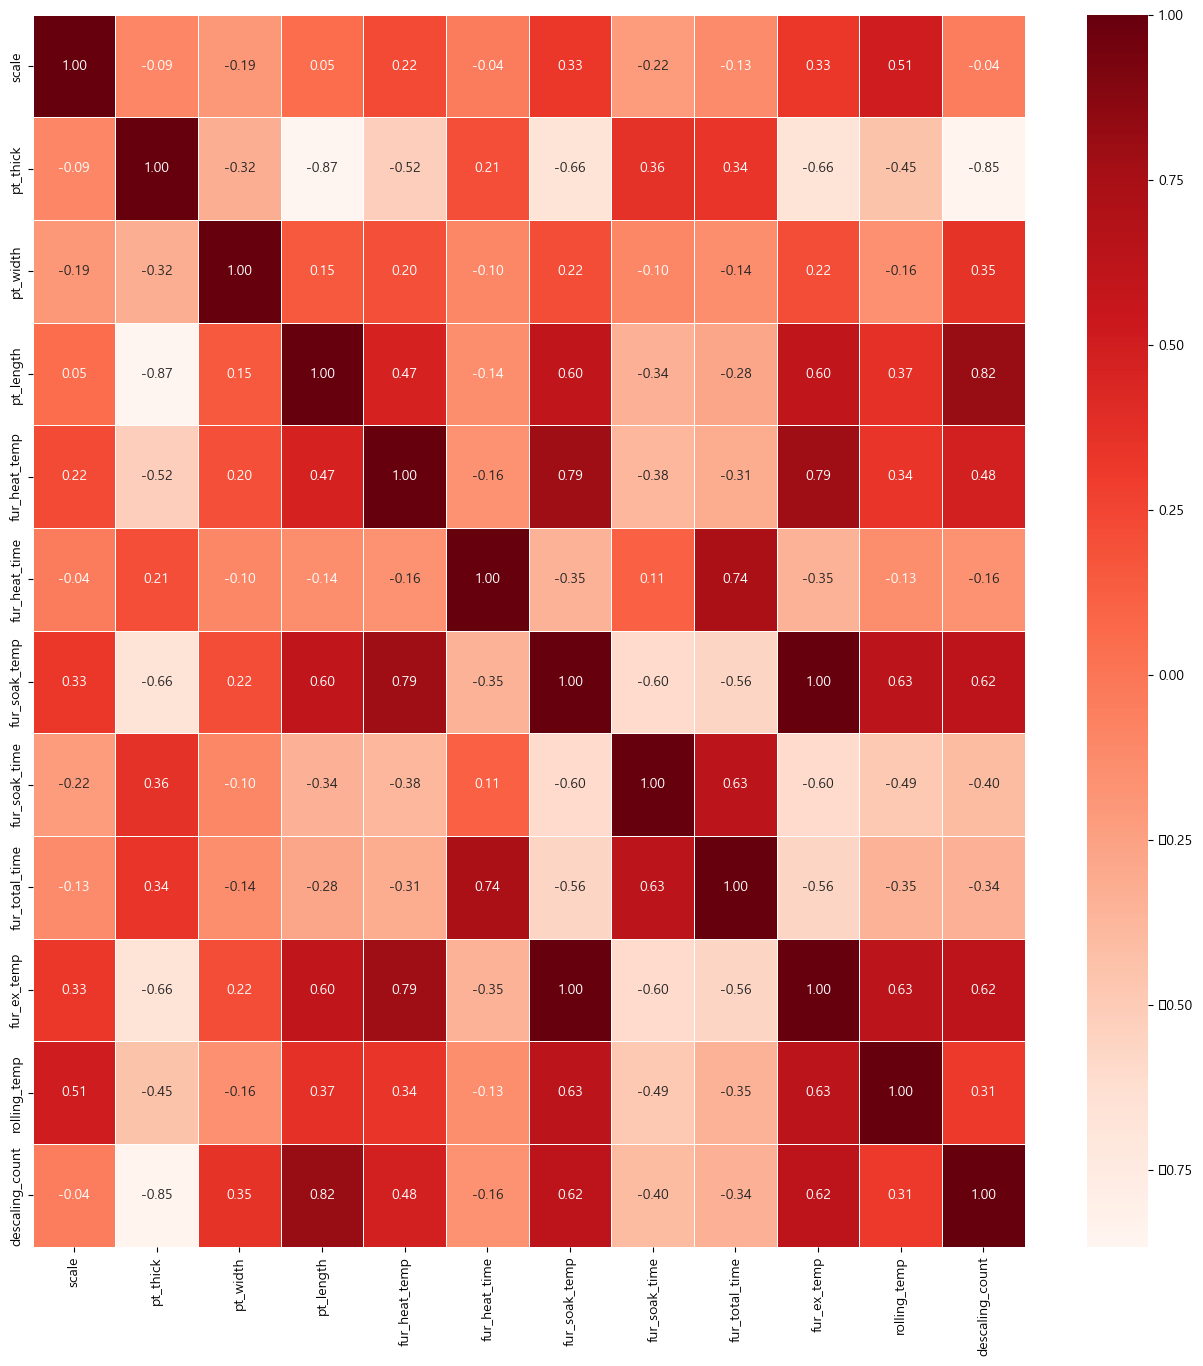

In [58]:
df_scale_x_num1 = df_raw.select_dtypes(exclude='object')
plt.figure(figsize= (16,16))
sns.heatmap(df_scale_x_num1.corr(),annot= True, fmt = ".2f",linewidths =.5,cmap ='Reds' )

연속형 변수간 상관계수가 1.00인게 보임  
이는 같은 데이터 값들을 가지고 있는 것으로 판단됨  
따라서, 둘 중 하나는 제거함

In [59]:
df_scale_x_num1.corr()

,scale,pt_thick,pt_width,pt_length,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,fur_ex_temp,rolling_temp,descaling_count
scale,1.000000,-0.094441,-0.193817,0.048928,0.220581,-0.036178,0.326957,-0.220873,-0.129333,0.326957,0.511333,-0.043415
pt_thick,-0.094441,1.000000,-0.320606,-0.866691,-0.522101,0.205822,-0.663015,0.363622,0.343731,-0.663015,-0.450942,-0.845154
pt_width,-0.193817,-0.320606,1.000000,0.148769,0.201312,-0.103698,0.218066,-0.101242,-0.137791,0.218066,-0.155038,0.353954
pt_length,0.048928,-0.866691,0.148769,1.000000,0.466737,-0.135821,0.599513,-0.336363,-0.278400,0.599513,0.366254,0.816850
fur_heat_temp,0.220581,-0.522101,0.201312,0.466737,1.000000,-0.161504,0.785440,-0.375056,-0.314602,0.785440,0.341403,0.483688
fur_heat_time,-0.036178,0.205822,-0.103698,-0.135821,-0.161504,1.000000,-0.347486,0.114218,0.736399,-0.347486,-0.131929,-0.163866
fur_soak_temp,0.326957,-0.663015,0.218066,0.599513,0.785440,-0.347486,1.000000,-0.601144,-0.564089,1.000000,0.628510,0.623454
fur_soak_time,-0.220873,0.363622,-0.101242,-0.336363,-0.375056,0.114218,-0.601144,1.000000,0.632780,-0.601144,-0.486545,-0.402145
fur_total_time,-0.129333,0.343731,-0.137791,-0.278400,-0.314602,0.736399,-0.564089,0.632780,1.000000,-0.564089,-0.345276,-0.340797
fur_ex_temp,0.326957,-0.663015,0.218066,0.599513,0.785440,-0.347486,1.000000,-0.601144,-0.564089,1.000000,0.628510,0.623454


fur_soak_temp와 fur_ex_temp가 동일한 데이터인 것을 알 수 있음  
따라서, 둘중 fur_soak_temp를 제거해주기로 결정

In [60]:
dff = df_scale_x_num1.drop(["rolling_date","scale","fur_soak_temp"], axis=1)
dff_const = add_constant(dff)
df_vif = pd.DataFrame()
df_vif["variable"] = dff_const.columns
df_vif["VIF"] = [variance_inflation_factor(dff_const.values,i) for i in range(dff_const.shape[1])]
df_vif.sort_values("VIF",ascending=True).round(2)

,variable,VIF
2,pt_width,1.61
9,rolling_temp,2.64
4,fur_heat_temp,3.28
6,fur_soak_time,3.82
5,fur_heat_time,4.26
10,descaling_count,4.53
3,pt_length,5.37
7,fur_total_time,6.57
1,pt_thick,6.93
8,fur_ex_temp,7.62


그 외의 설명변수들 사이에는 서로 상관관계가 없어보임

범주형 변수 : steel_kind, hsb, rolling_method, work_group만 분석에 사용  
연속형 변수 : fur_soak_temp 제거

### 분석에 사용될 변수

In [61]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 994 entries, 0 to 999
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   plate_no         994 non-null    object        
 1   rolling_date     994 non-null    datetime64[ns]
 2   scale            994 non-null    int64         
 3   spec_long        994 non-null    object        
 4   spec_country     994 non-null    object        
 5   steel_kind       994 non-null    object        
 6   pt_thick         994 non-null    int64         
 7   pt_width         994 non-null    int64         
 8   pt_length        994 non-null    int64         
 9   hsb              994 non-null    object        
 10  fur_no           994 non-null    object        
 11  fur_input_row    994 non-null    object        
 12  fur_heat_temp    994 non-null    int64         
 13  fur_heat_time    994 non-null    int64         
 14  fur_soak_temp    994 non-null    int64    

In [62]:
df_final = df_raw.drop(['plate_no','rolling_date','fur_soak_temp','spec_long','spec_country','fur_no','fur_input_row'],axis=1)
df_final.head()

,scale,steel_kind,pt_thick,pt_width,pt_length,hsb,fur_heat_temp,fur_heat_time,fur_soak_time,fur_total_time,fur_ex_temp,rolling_method,rolling_temp,descaling_count,work_group
0,0,T,32,3700,15100,적용,1144,116,59,259,1133,TMCP(온도제어),934,8,1조
1,0,T,32,3700,15100,적용,1144,122,53,238,1135,TMCP(온도제어),937,8,1조
2,0,T,33,3600,19200,적용,1129,116,55,258,1121,TMCP(온도제어),889,8,1조
3,0,T,33,3600,19200,적용,1152,125,68,266,1127,TMCP(온도제어),885,8,1조
4,0,T,38,3100,13300,적용,1140,134,48,246,1128,TMCP(온도제어),873,8,1조


In [63]:
df_final.reset_index(drop=True,inplace=True)

In [64]:
df_raw_dummy = pd.get_dummies(df_final)
df_raw_dummy.head()

,scale,pt_thick,pt_width,pt_length,fur_heat_temp,fur_heat_time,fur_soak_time,fur_total_time,fur_ex_temp,rolling_temp,...,steel_kind_C,steel_kind_T,hsb_미적용,hsb_적용,rolling_method_CR(제어압연),rolling_method_TMCP(온도제어),work_group_1조,work_group_2조,work_group_3조,work_group_4조
0,0,32,3700,15100,1144,116,59,259,1133,934,...,0,1,0,1,0,1,1,0,0,0
1,0,32,3700,15100,1144,122,53,238,1135,937,...,0,1,0,1,0,1,1,0,0,0
2,0,33,3600,19200,1129,116,55,258,1121,889,...,0,1,0,1,0,1,1,0,0,0
3,0,33,3600,19200,1152,125,68,266,1127,885,...,0,1,0,1,0,1,1,0,0,0
4,0,38,3100,13300,1140,134,48,246,1128,873,...,0,1,0,1,0,1,1,0,0,0


In [65]:
final_x = df_raw_dummy.drop("scale",axis=1)
final_y = df_raw_dummy['scale']

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(final_x,final_y,test_size=0.3,random_state=11)

print("분할 전 설명변수 데이터:",final_x.shape)
print("분할 후 설명변수 데이터:Train", df_train_x.shape," Test",df_test_x.shape)

분할 전 설명변수 데이터: (994, 20)
분할 후 설명변수 데이터:Train (695, 20)  Test (299, 20)


In [66]:
df_train_x.reset_index(drop=True,inplace=True)
df_test_x.reset_index(drop=True,inplace=True)
df_train_y.reset_index(drop=True,inplace=True)
df_test_y.reset_index(drop=True,inplace=True)

In [67]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 994 entries, 0 to 993
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scale            994 non-null    int64 
 1   steel_kind       994 non-null    object
 2   pt_thick         994 non-null    int64 
 3   pt_width         994 non-null    int64 
 4   pt_length        994 non-null    int64 
 5   hsb              994 non-null    object
 6   fur_heat_temp    994 non-null    int64 
 7   fur_heat_time    994 non-null    int64 
 8   fur_soak_time    994 non-null    int64 
 9   fur_total_time   994 non-null    int64 
 10  fur_ex_temp      994 non-null    int64 
 11  rolling_method   994 non-null    object
 12  rolling_temp     994 non-null    int64 
 13  descaling_count  994 non-null    int64 
 14  work_group       994 non-null    object
dtypes: int64(11), object(4)
memory usage: 116.6+ KB


In [68]:
name=['pt_thick','pt_width','pt_length','fur_heat_temp','fur_heat_time','fur_soak_time','fur_total_time','fur_ex_temp','rolling_temp','descaling_count']
num_df_train_x=df_train_x[name]

# StandardScaler 적용
scaler = StandardScaler()
scaled_data = scaler.fit_transform(num_df_train_x)

# 스케일링된 데이터를 새로운 데이터프레임으로 생성
scaled_df_train_x = pd.DataFrame(scaled_data, columns=name)

In [69]:
num_df_test_x=df_test_x[name]

scaled_data = scaler.transform(num_df_test_x)

# 스케일링된 데이터를 새로운 데이터프레임으로 생성
scaled_df_test_x = pd.DataFrame(scaled_data, columns=name)

In [70]:
ob_train_x = df_train_x.drop(name,axis=1)
ob_test_x = df_test_x.drop(name,axis=1)

In [71]:
final_train_x = pd.concat([scaled_df_train_x, ob_train_x], axis=1)
final_test_x = pd.concat([scaled_df_test_x, ob_test_x], axis=1)

#### 로지스틱 회귀

In [72]:
from statsmodels.api import Logit

In [73]:
a = pd.concat([df_train_x,df_train_y],axis=1)
a.rename(columns={"rolling_method_CR(제어압연)":"rolling_method_CR","rolling_method_TMCP(온도제어)":"rolling_method_TMCP"},inplace=True)

In [74]:
log_model = Logit.from_formula(formula="scale ~pt_thick + pt_width + pt_length + fur_heat_temp + fur_heat_time +\
       fur_soak_time + fur_total_time + fur_ex_temp + rolling_temp+\
       descaling_count + steel_kind_C + steel_kind_T + hsb_미적용 + hsb_적용+\
       rolling_method_CR + rolling_method_TMCP + work_group_1조 +\
       work_group_2조 + work_group_3조 + work_group_4조", data=a)
log_result = log_model.fit()
print(log_result.summary())

         Current function value: 0.285839
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                  scale   No. Observations:                  695
Model:                          Logit   Df Residuals:                      678
Method:                           MLE   Df Model:                           16
Date:                Tue, 23 May 2023   Pseudo R-squ.:                  0.5278
Time:                        09:15:08   Log-Likelihood:                -198.66
converged:                      False   LL-Null:                       -420.67
Covariance Type:            nonrobust   LLR p-value:                 2.081e-84
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             -34.3833        nan        nan        nan         nan         nan
pt_thick               -0.0065      0.

로지스틱 회귀 모델은 그렇게 좋은 모델로 보이지 않으므로 다른 모델을 집중적으로 하기로 결정

#### 의사결정나무

In [75]:
tree_uncustomized = DecisionTreeClassifier(random_state=11)
tree_uncustomized.fit(df_train_x, df_train_y)
print("Score on training set:{:.3f}".format(tree_uncustomized.score(df_train_x,df_train_y)))
print("Score on test set:{:.3f}".format(tree_uncustomized.score(df_test_x,df_test_y)))

Score on training set:1.000
Score on test set:0.977


In [76]:
param_grid = {
    "max_depth": range(2, 10),
    "min_samples_split": range(2, 40, 2),
    "min_samples_leaf": range(2, 20, 2)
}

In [77]:
# grid_dt = GridSearchCV(tree_uncustomized, param_grid, cv =3 , n_jobs = -1)
# grid_dt.fit(df_train_x,df_train_y)

In [78]:
#print("best model: \n{}".format(grid_dt.best_estimator_))
#print("\nbest parameter: \n{}".format(grid_dt.best_params_))
#print("\nbest score: \n{}".format(grid_dt.best_score_.round(3)))
#print("\nbest set score: \n{}".format(grid_dt.score(df_test_x,df_test_y).round(3)))

In [79]:
tree_final = DecisionTreeClassifier(min_samples_leaf = 6,min_samples_split = 12,max_depth = 5, random_state=11)
tree_final.fit(df_train_x, df_train_y)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=6, min_samples_split=12,
                       random_state=11)

In [80]:
y_pred = tree_final.predict(df_test_x)
print("Accuracy:{0:.3f}\n".format(tree_final.score(df_test_x,df_test_y)))
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y,y_pred)))
print(classification_report(df_test_y,y_pred,digits=3))

Accuracy:0.950

Confusion matrix: 
[[193   0]
 [ 15  91]]
              precision    recall  f1-score   support

           0      0.928     1.000     0.963       193
           1      1.000     0.858     0.924       106

    accuracy                          0.950       299
   macro avg      0.964     0.929     0.943       299
weighted avg      0.953     0.950     0.949       299



In [81]:
df_importance = pd.DataFrame()
df_importance["Feature"] = df_train_x.columns
df_importance["importance"] = tree_final.feature_importances_

df_importance.sort_values("importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,importance
8,rolling_temp,0.600
13,hsb_적용,0.185
7,fur_ex_temp,0.164
9,descaling_count,0.050
0,pt_thick,0.000
12,hsb_미적용,0.000
18,work_group_3조,0.000
17,work_group_2조,0.000
16,work_group_1조,0.000
15,rolling_method_TMCP(온도제어),0.000


Text(0, 0.5, '변수')

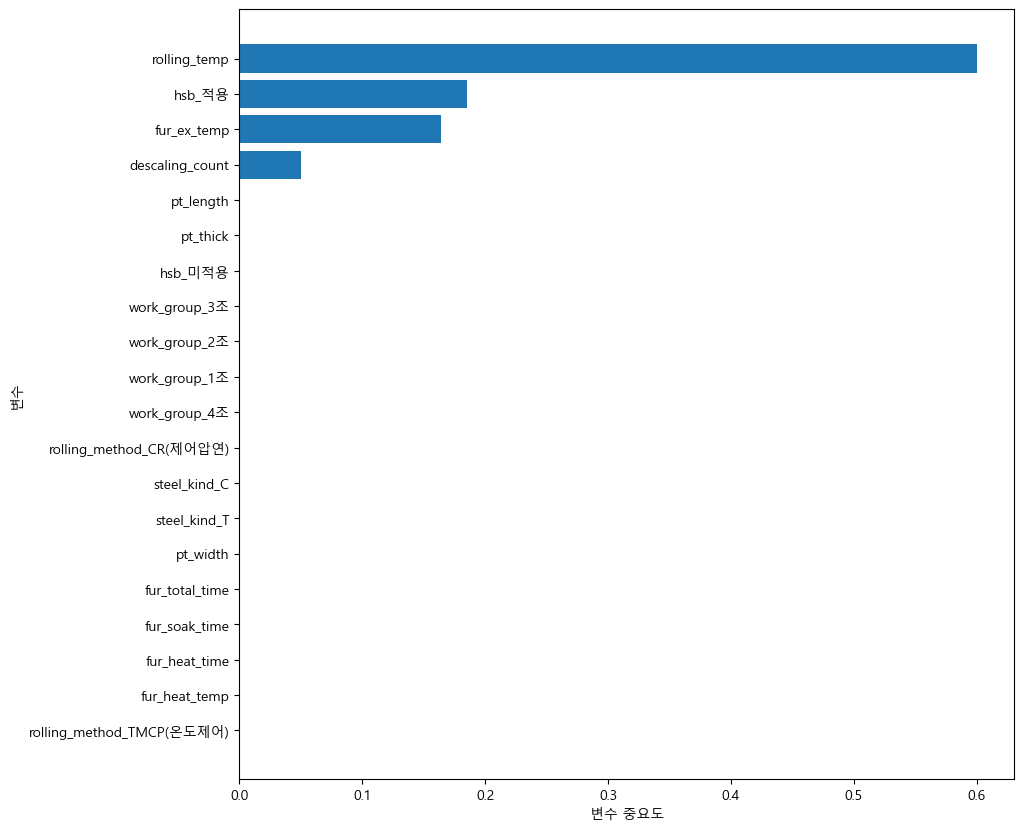

In [82]:
plt.figure(figsize=(10, 10))
df_importance.sort_values("importance", ascending=True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates, width = df_importance["importance"])
plt.yticks(coordinates,df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

#### 랜덤포레스트

In [83]:
rf_uncustomized = RandomForestClassifier(random_state=11)
rf_uncustomized.fit(df_train_x,df_train_y)

print("Accuracy on training set: {:.3f}".format(rf_uncustomized.score(df_train_x,df_train_y)))
print("Accuracy on test set: {:.3f}".format(rf_uncustomized.score(df_test_x,df_test_y)))

Accuracy on training set: 1.000
Accuracy on test set: 0.953


In [84]:
param_grid = {"max_depth" : range(2, 10),
             "min_samples_split" : range(2, 40, 2),
             "min_samples_leaf" : range(2, 20, 2)}

In [85]:
#grid_rf = GridSearchCV(rf_uncustomized, param_grid, cv=3, n_jobs = -1)
#grid_rf.fit(df_train_x, df_train_y)

In [86]:
#print("best model: \n{}".format(grid_rf.best_estimator_))
#print("\nbest parameter: \n{}".format(grid_rf.best_params_))
#print("\nbest score: \n{}".format(grid_rf.best_score_.round(3)))
#print("\nbest set score: \n{}".format(grid_rf.score(df_test_x,df_test_y).round(3)))

In [87]:
rf_final = RandomForestClassifier(min_samples_leaf = 2, min_samples_split = 4,
                                max_depth = 6, random_state = 11)
rf_final.fit(df_train_x, df_train_y)

RandomForestClassifier(max_depth=6, min_samples_leaf=2, min_samples_split=4,
                       random_state=11)

In [88]:
y_pred = rf_final.predict(df_test_x)
print("Accuracy:{0:.3f}\n".format(rf_final.score(df_test_x,df_test_y)))
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y,y_pred)))
print(classification_report(df_test_y,y_pred,digits=3))

Accuracy:0.950

Confusion matrix: 
[[193   0]
 [ 15  91]]
              precision    recall  f1-score   support

           0      0.928     1.000     0.963       193
           1      1.000     0.858     0.924       106

    accuracy                          0.950       299
   macro avg      0.964     0.929     0.943       299
weighted avg      0.953     0.950     0.949       299



In [89]:
df_importance = pd.DataFrame()
df_importance["Feature"] = final_train_x.columns
df_importance["importance"] = rf_final.feature_importances_

df_importance.sort_values("importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,importance
8,rolling_temp,0.402
7,fur_ex_temp,0.107
1,pt_width,0.079
13,hsb_적용,0.071
12,hsb_미적용,0.064
9,descaling_count,0.052
3,fur_heat_temp,0.045
0,pt_thick,0.039
2,pt_length,0.034
11,steel_kind_T,0.027


Text(0, 0.5, '변수')

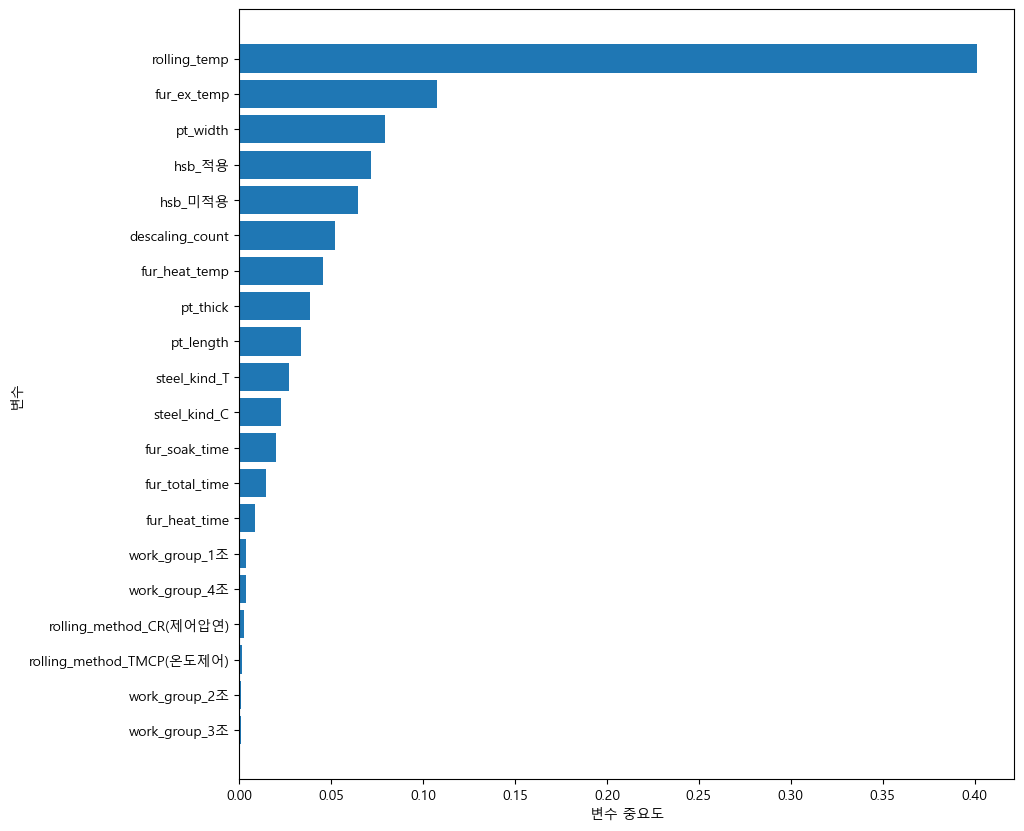

In [90]:
plt.figure(figsize=(10, 10))
df_importance.sort_values("importance", ascending=True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates, width = df_importance["importance"])
plt.yticks(coordinates,df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

#### 그래디언트부스팅

In [91]:
gb_model = GradientBoostingClassifier()
gb_model.fit (df_train_x, df_train_y)

GradientBoostingClassifier()

In [92]:
print("Accuracy on training set: {:.3f}".format(gb_model.score(df_train_x,df_train_y)))
print("Accuracy on test set: {:.3f}".format(gb_model.score(df_test_x,df_test_y)))

Accuracy on training set: 1.000
Accuracy on test set: 1.000


In [93]:
param_grid = {"max_depth" : range(2, 10),
             "min_samples_split" : range(2, 40, 2),
             "min_samples_leaf" : range(2, 20, 2)}

In [95]:
#grid_gb = GridSearchCV(gb_model, param_grid, cv=3, n_jobs = -1)
#grid_gb.fit(df_train_x, df_train_y)

In [96]:
#print("best model: \n{}".format(grid_gb.best_estimator_))
#print("\nbest parameter: \n{}".format(grid_gb.best_params_))
#print("\nbest score: \n{}".format(grid_gb.best_score_.round(3)))
#print("\nbest set score: \n{}".format(grid_gb.score(df_test_x,df_test_y).round(3)))

In [97]:
gb_final = GradientBoostingClassifier(min_samples_leaf = 2, min_samples_split = 28,
                                max_depth = 6, random_state = 11)
gb_final.fit(df_train_x, df_train_y)

GradientBoostingClassifier(max_depth=6, min_samples_leaf=2,
                           min_samples_split=28, random_state=11)

In [166]:
y_pred = gb_final.predict(df_test_x)
print("Accuracy:{0:.3f}\n".format(gb_final.score(df_test_x,df_test_y)))
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y,y_pred)))
print(classification_report(df_test_y,y_pred,digits=3))

Accuracy:0.987

Confusion matrix: 
[[193   0]
 [  4 102]]
              precision    recall  f1-score   support

           0      0.980     1.000     0.990       193
           1      1.000     0.962     0.981       106

    accuracy                          0.987       299
   macro avg      0.990     0.981     0.985       299
weighted avg      0.987     0.987     0.987       299



In [99]:
df_importance = pd.DataFrame()
df_importance["Feature"] = df_train_x.columns
df_importance["importance"] = gb_final.feature_importances_

df_importance.sort_values("importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,importance
8,rolling_temp,0.530
7,fur_ex_temp,0.144
13,hsb_적용,0.106
9,descaling_count,0.093
0,pt_thick,0.060
12,hsb_미적용,0.058
6,fur_total_time,0.004
5,fur_soak_time,0.001
1,pt_width,0.001
4,fur_heat_time,0.001


Text(0, 0.5, '변수')

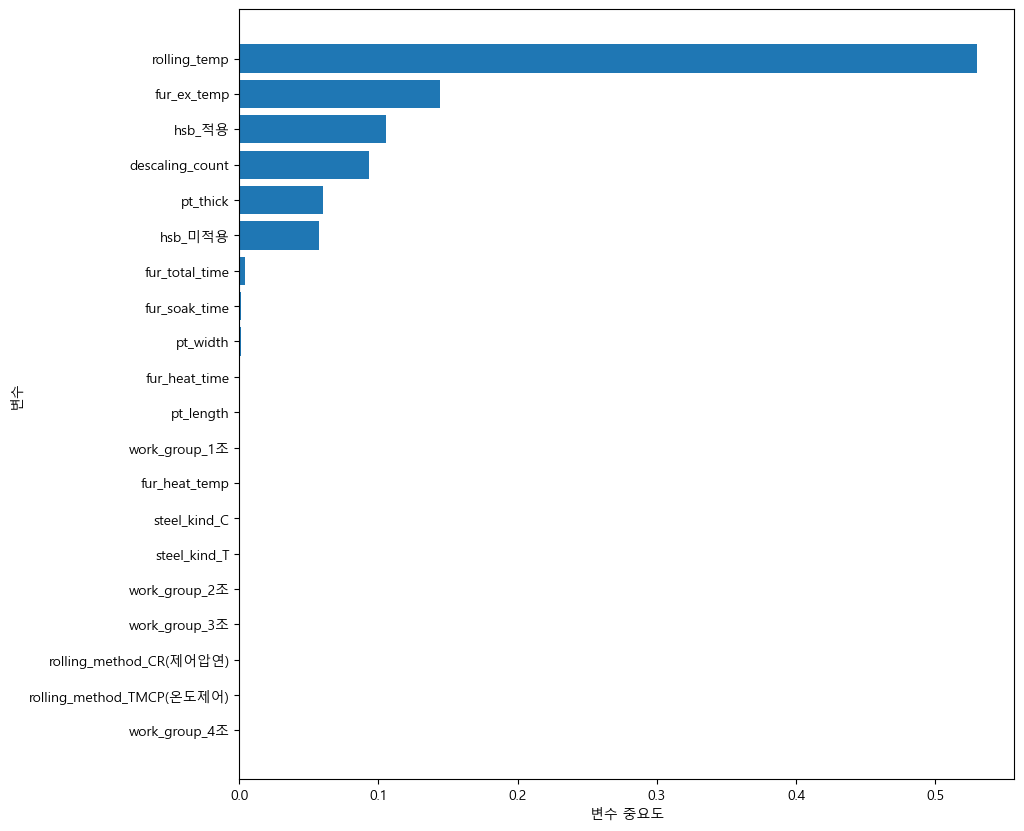

In [100]:
plt.figure(figsize=(10, 10))
df_importance.sort_values("importance", ascending=True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates, width = df_importance["importance"])
plt.yticks(coordinates,df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

In [108]:
temp_25 = df_raw.loc[df_raw['rolling_temp']<=df_raw['rolling_temp'].describe()['25%']]

In [110]:
temp_75 = df_raw.loc[df_raw['rolling_temp']>=df_raw['rolling_temp'].describe()['75%']]

In [109]:
temp_2575 = df_raw.loc[(df_raw['rolling_temp']>df_raw['rolling_temp'].describe()['25%'])&
          (df_raw['rolling_temp']<df_raw['rolling_temp'].describe()['75%'])]

In [119]:
counts_25 = temp_25['scale'].value_counts()
counts_25

0    231
1     21
Name: scale, dtype: int64

In [120]:
counts_75=temp_75['scale'].value_counts()
counts_75

1    203
0     57
Name: scale, dtype: int64

In [121]:
counts_2575 = temp_2575['scale'].value_counts()
counts_2575

0    396
1     86
Name: scale, dtype: int64

In [156]:
aa = pd.DataFrame(df_raw.corr()['rolling_temp']).T
aa.drop('fur_soak_temp',axis=1,inplace=True)

<Axes: >

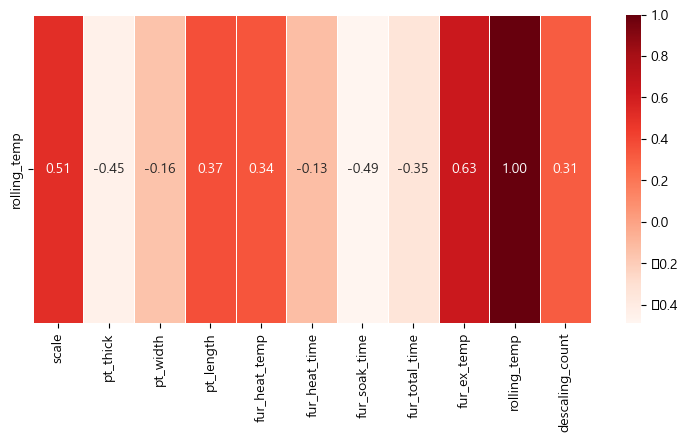

In [157]:
plt.figure(figsize= (9,4))
sns.heatmap(aa,annot= True, fmt = ".2f",linewidths =.5,cmap ='Reds' )

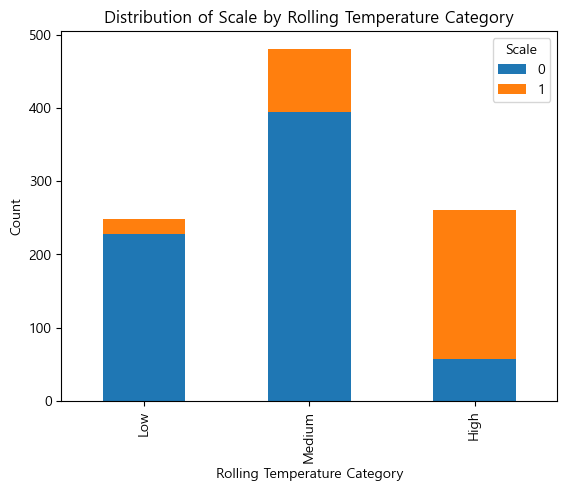

In [165]:
# rolling_temp을 범주화하여 새로운 컬럼 생성 (예시: 3개의 범주로 나누기)
df_raw['rolling_temp_category'] = pd.cut(df_raw['rolling_temp'], bins=[723, 895, 990, 1078], labels=['Low', 'Medium', 'High'])

# 각 범주별 scale의 분포 계산
category_counts = df_raw.groupby('rolling_temp_category')['scale'].value_counts().unstack()

# 막대 그래프 그리기
category_counts.plot(kind='bar', stacked=True)

# 그래프 설정
plt.title('Distribution of Scale by Rolling Temperature Category')
plt.xlabel('Rolling Temperature Category')
plt.ylabel('Count')

# 범례 설정
plt.legend(title='Scale')

# 그래프 출력
plt.show()